# **PREDICTING MOVIES BOX OFFICE REVENUES**

![Cover](images/cover_image.png)

### Table of Contents
* [Introduction](#intro)
* [**Step 1**: Loading the Data and Identifying the Target Variable](#step1)
    * [Getting Familiar with the Data](#section_1_1)
    * [Selecting and Analyzing the Target Variable](#section_1_2)
* [**Step 2**: Data Wrangling, Exploratory Analysis and Feature Engineering](#step2)   
    * [Working with the Numeric Features](#section_2_1)
    * [Trimming the Non-Numeric Features](#section_2_2)
    * [Engineering the Non-Numeric Features](#section_2_3)
* [**Step 3**: Predictive Modeling and Performance Evaluation](#step3)
    * [Using a Linear Regression Model](#section_3_1)
    * [Using a Ridge Regression Model](#section_3_2)
    * [Using a Random Forest Regressor](#section_3_3)
    * [Using a Gradient Boosting Regressor](#section_3_4)
* [Conclusion](#conclusion)    

<a class="anchor" id="intro"></a>

## Introduction

Movies are one of the most universal forms of entertainment; people in every part of the world crowd into theaters waiting for the projector's light to hit the big screen. Before the COVID pandemic stroke in 2020, the global yearly revenue generated by the movie industry was estimated to be $41.7 billion.   

The myriad of different stories to tell, the creative freedom the cinematographic art allows, is arguably what really
makes movies so attractive. Beneath this romantic view, however, we need to keep in mind that film studios are in business to make a profit; for the most part, the prospect of multimillion revenues is really what convinces stakeholders to invest in the production of a flick.

## Project Objective

In this project we use machine-learning modeling to predict movies' box office gross revenues; to reach this goal, we rely on information such as movies' budget, genres, release date and popularity. 

Along the way, through data wrangling and exploratory analysis, we unveil interesting statistical facts involving movies. By the end of the project, we have a clear idea of what are the factors that more greatly influence the revenue of a film.   

## About the Data

To train our models we use a variety of metadata about 3,000 different movies. The dataset containing this information can be downloaded from [this](https://www.kaggle.com/competitions/tmdb-box-office-prediction/data) Kaggle page and was originally obtained using the API of [The Movie Database](https://www.themoviedb.org/) (TMDB), a popular website which collects extensive data about motion pictures and TV shows.    

## Project Overview

The project is divided into 3 main steps:
- **Step 1**: *Loading the Data and Identifying the Target Variable*.
- **Step 2**: *Data Wrangling, Exploratory Analysis and Feature Engineering*: this is the most extensive part and it is functional to getting the data ready for modeling.
- **Step 3**: *Predictive Modeling and Performance Evaluation*: here we actually train the regression models and predict the movies' revenues; models' performance is evaluated using the Root Mean Squared Error metric.

---

<a class="anchor" id="step1"></a>

# **STEP 1: Loading the Data and Identifying the Target Variable**

Let's first of all activate an IPython option that will improve the notebook organization by reducing the number of cells we use.    

In [1]:
# Allow to run all code in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a class="anchor" id="section_1_1"></a>

## Getting Familiar with the Data

We are ready to dive into the data.

In [2]:
import pandas as pd

# Read-in the CSV file with the data
movies_df = pd.read_csv("Datasets/TMDB_data.csv")

In [3]:
# Print number of rows and columns
print("# of rows:", movies_df.shape[0])
print("# of columns:", movies_df.shape[1])

# of rows: 3000
# of columns: 23


In [4]:
# Print the names of the columns
movies_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [5]:
import numpy as np

# Print the name of the numeric columns
numeric_movies_df = movies_df.select_dtypes(include = np.number)
print("The numeric columns are:\n", numeric_movies_df.columns)

print("---")

# Print the name of the non-numeric columns
non_numeric_movies_df = movies_df.select_dtypes(exclude = np.number)
print("The non-numeric columns are:\n", non_numeric_movies_df.columns)

The numeric columns are:
 Index(['id', 'budget', 'popularity', 'runtime', 'revenue'], dtype='object')
---
The non-numeric columns are:
 Index(['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast',
       'crew'],
      dtype='object')


In [6]:
# Allow display of all columns in a dataframe
pd.set_option("display.max_columns", None)

# Take a look at the first three rows
movies_df.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


The dataset contains 3,000 rows; each of them corresponds to a movie. We have a total of 23 columns. The kind of information contained in each column can be inferred easily from the column's name but more specific details can be found at the [Bible page](https://www.themoviedb.org/bible/movie) of the TMDB website.

The `id` and `imdb_id` columns don't really contain any substantial information but serve as identifiers to distinguish between different movies. Specifically, the latter contains the path one needs to append to the URL https://www.imdb.com/title/ in order to reach the [IMDB](https://www.imdb.com/)'s movie page. This is a popular and comprehensive database for movies; its pages could come handy in case we will need to replace some missing information.   

A few columns (such as `production_companies`, `spoken_languages`, `genres` and `cast`) stick out because they contain strings which use a syntax reminiscent of JSON. This must be the result of how the API returns the data following a request. We will make sure to format these strings properly when needed.   

The `popularity` column contains a popularity score for each movie; it's a litte unclear how this score is calculated, but some info can be found at the [related page](https://developers.themoviedb.org/3/getting-started/popularity) on the TMDB API website.

It's important to notice that out of all the 23 columns, only 5 of them are of numeric type; this suggests that we will need quite a bit of data wrangling and feature engineering before being able to train our first model.

As one last piece of general information, let's print each column's null values count and let's check for duplicate rows.

In [7]:
# Print the columns' null values count
movies_df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [8]:
print("The dataframe has duplicate rows:", movies_df.duplicated().any())
print("The dataframe has duplicate movie titles:", movies_df.duplicated(subset = "title").any())

The dataframe has duplicate rows: False
The dataframe has duplicate movie titles: True


There are quite a few null values: we will look more into this issue during the exploratory data analysis step. 

We don't have any duplicate row; however, there are some duplicate movie titles. This means that, to distinguish between movies, we are better using one of the identifiers columns rather than the titles.

## Setting Up a Plotting Environment

We will soon start exploring the data in more details by looking at each column separately and displaying some of the variable distributions, but for now let's fix the plotting style and parameters we will use throughout the notebook. 

In [9]:
import matplotlib.pyplot as plt

# Reset the plotting parameters to make titles bigger and bold throughout the notebook
plt.style.use(style="ggplot")
par = {"axes.titlesize":18, "axes.titleweight":"bold", "figure.figsize":[12,6]}
plt.rcParams.update(par)

<a class="anchor" id="section_1_2"></a>

## Selecting and Analyzing the Target Variable

Our goal is to predict movies' box office grosses. Looking at the first few rows we printed above, we soon realize this information is contained in the `revenue` column. However, it's not clear whether these numbers refer to US only, domestic (US and Canada) or worldwide box office. Consulting again to the [Bible page](https://www.themoviedb.org/bible/movie#:~:text=including%20end%20credits.-,Budget%20%26%20Revenue,-The%20budget%20and), we learn that there's no enforced rule to establish it. 

This lack of uniformity introduces a certain degree of variance we don't have control over. To make the data more rigorous we could try to pull more data from other resources which keep track of movies' financial information. However, most of them are either not as exhaustive (like [BoxOfficeMojo.com](https://www.boxofficemojo.com/)) or require specific permissions in order to use their API (like [TheNumbers.com](https://www.the-numbers.com/)).

Ultimately, we must be content with the data we have. Hence, we officially elect the `revenue` column as our target variable. Let's start getting acquainted with the distribution of its values.

In [10]:
# Show the 3 movie with highest revenue
movies_df.sort_values("revenue", ascending = False)[["title", "revenue"]].head(3)

,title,revenue
1126,The Avengers,1519557910
1761,Furious 7,1506249360
2770,Avengers: Age of Ultron,1405403694


In [11]:
# Print summary statistics of `revenue` column
movies_df["revenue"].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

We immediately notice a minimum value of \$1, which clearly can't be any movie's real revenue; we will need to inspect this issue further and possibly identify other similar invalid values. 

The mean box office revenue is close to \\$67 million. However, this value is not representative of the whole distribution: for one thing, the standard deviation is insanely high (more than \\$100 million); also, the median revenue doesn't reach \\$20 million. In fact, the mean value falls just shy of the upper quartile.   

Given these obeservations, we expect the distribution of revenues to have a very strong positive skew. Let's quantify this skew by checking its magnitude; moreover, to get a quick visual intuition, let's also draw an histogram for the `revenue` column.      

In [12]:
print("The skew of the `revenue` distribution is:", movies_df["revenue"].skew())

The skew of the `revenue` distribution is: 4.542285301660683


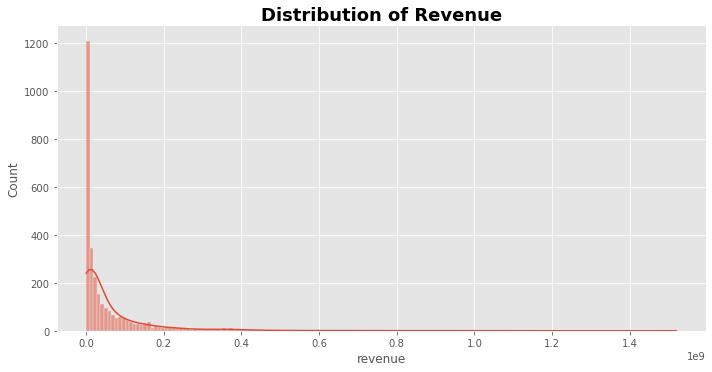

In [13]:
import seaborn as sns

# Draw distribution of the revenues
sns.displot(data = movies_df, x = "revenue", kde = True, aspect = 16/8);
plt.title("Distribution of Revenue");

As expected, the distribution features a very long tail on the right side. This tail, however, gets very flat very quickly; in fact, the vast majority of movies appears near the origin but the presence of a few blockbusters pulls the distribution in the positive direction. 

Because of these outliers, the scale of the plot is irksome and makes it hard to recognize the different bins. To get a better picture, let's zoom into the part of the graph which contains most movies. 

In [14]:
# Filter out blockbuster movies with very high revenue values
most_movies_df = movies_df[movies_df["revenue"] < 0.2 * 10**9]

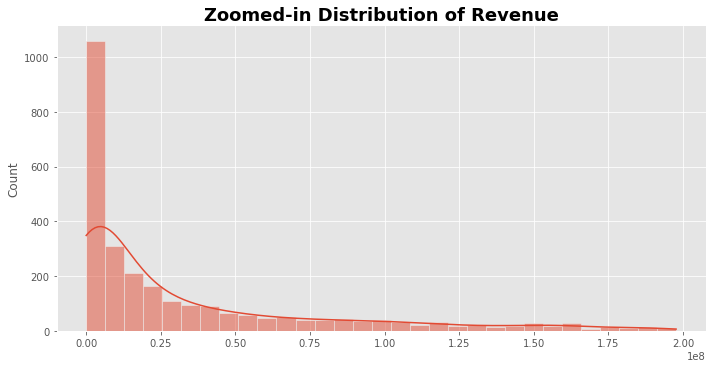

In [15]:
# Draw distribution of the revenues zooming into the segment which contains the most movies
sns.displot(data = most_movies_df, x = "revenue", kde = True, aspect = 16/8);
plt.xlabel("");
plt.title("Zoomed-in Distribution of Revenue");

Now we see more clearly that roughly half of the movies have a revenue below \$12.5 million. 

### Filtering Out Invalid Values

In the plot above the highest bar is the one that starts at the origin and ends at \$6.25 million. Such a range is quite large and can very well include many movies. Since we have already spotted an invalid minimum value, however, we should make sure this high density of "low-revenue" films is legit and is not influenced by the presence of bogus values. 

At this point, it's hard to say what would be a good threshold to separate suspicioulsy low revenues but for now let's set it at \$5,000. 

In [16]:
# Find movies with revenue lower than $5,000
low_revenue = movies_df[movies_df["revenue"] < 5000]

print("There are {} movies with revenue lower than $5,000.".format(low_revenue.shape[0]))

There are 70 movies with revenue lower than $5,000.


In [17]:
print("The lowest revenues in ascending order are:")
np.sort(low_revenue["revenue"].unique())

The lowest revenues in ascending order are:


array([   1,    2,    3,    4,    5,    6,    7,    8,   10,   11,   12,
         13,   15,   18,   20,   23,   25,   30,   32,   46,   60,   70,
         79,   85,   88,   97,  100,  121,  125,  126,  135,  198,  204,
        241,  306,  311,  404,  422,  500,  525,  641,  671,  923, 1404,
       1469, 1938, 2303, 2340, 2970, 3003, 3358, 3462, 4187, 4275, 4542,
       4631], dtype=int64)

Besides the minimum revenue of \\$1, we have many other questionable values. Trying to find a method to replace these values could be cumbersome and possibly damaging, since we might introduce bias in the data. Since our search above returned just a small portion of datapoints (70 out of 3,000), we can drop the rows corresponding to movies with suspicious revenues without suffering an important loss of data; but of course, the hard part is deciding which revenues, among the ones above, we should disregard. 

We can probably safely assume that any value below \$100 is artificial. On the other hand, it's not impossible to imagine that a movie which is released for a very short period of time in a handful of theaters can accumulate a revenue of just a few hundreds dollars. We notice that the first significant gap between two consecutive values happens in correspondence of the \\$1,000 mark. Therefore, to be a little safer, we will drop all movies with a revenue below \\$1,000.  

In [18]:
# Keep only movies with revenue greater than $1,000
# Save the result in a new variable so that we can always refer back to the original dataframe
movies = movies_df[movies_df["revenue"] > 1000].reset_index(drop = True) # We reset and drop the index because we can use
                                                                         # the `id` column to loop back to the original data

In [19]:
print("We have {} datapoints remaining.".format(movies.shape[0]))

We have 2943 datapoints remaining.


### Transforming the Target Column

In the previous step we have dropped 2% of all the movies we had available. Given this small fraction, the distribution of the `revenue` column can't have changed much and must still feature a strong positive skew.

In [20]:
print("The skew of the original `revenue` distribution was:", movies_df["revenue"].skew())
print("The skew of the current `revenue` distribution is:", movies["revenue"].skew())

The skew of the original `revenue` distribution was: 4.542285301660683
The skew of the current `revenue` distribution is: 4.504084089706932


Regression models, especially linear models, do not perform well on strongly skewed data like the one we have here. This is because:
- Skewness is usually caused by the presence of outliers and it is well known that outliers tend to pull the predictions away from the true values.
- Skewed data often leads to skewed residuals and linear regression operates under the assumption the residuals are normally distributed. 
- The skewness of the target variable could negatively impact its linear relationship with the features; since linearity is one of the basic hypothesis of linear regression, this could affect the model accuracy.

To mitigate the skeweness of a variable, it is advisable to transform it by applying a function to all values. A popular choice is to use the log function. Besides addressing the issues we mentioned above, training a model on log transformed data yields errors that are multiplicative with respect to the original data. This means that, when evaluating the performance of our models, we will be able to say something like "our predictions are on average one and a half time the true value". This is much better than saying "our predictions are on average \$1 million above the true value": such an error is acceptable for a blockbuster which grossed \\$80 million but is utter nonsense if we consider movies with much lower revenues (possibly even lower than \\$1 million).    

In what follows we put into action what we theorized above by applying the log function to the `revenue` column. When we are done, we look at the distribution of the new, log transformed values and see how it compares to the original variable.  

In [21]:
# Log transform the `revenue` column
movies["log_revenue"] = np.log(movies["revenue"])

In [22]:
print("The skew of the log transformed `revenue` distribution is:", movies["log_revenue"].skew())

The skew of the log transformed `revenue` distribution is: -0.8439178021333138


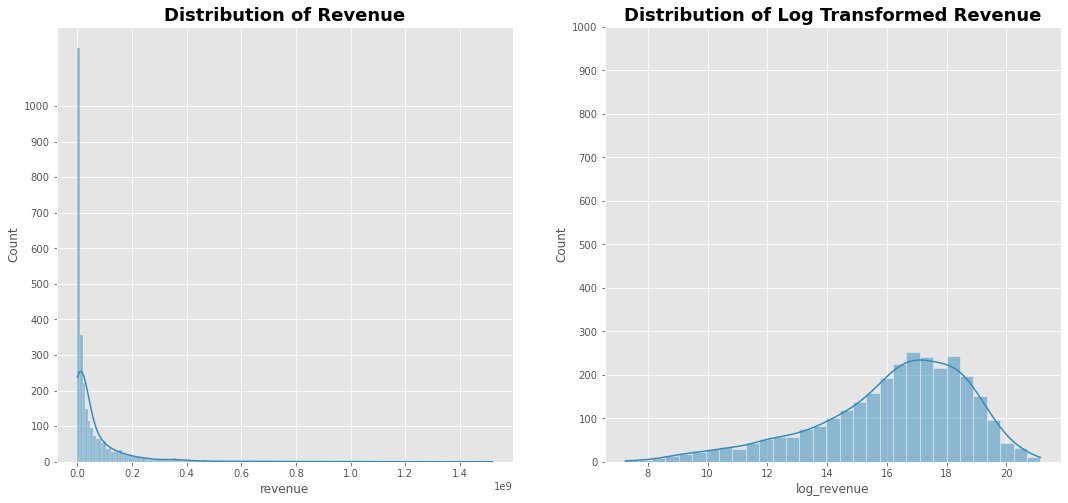

In [23]:
# Draw the distributions of the original and the log transformed revenues side by side
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw the distribution of the original revenues on the left
revenue = sns.histplot(data = movies, x = "revenue", kde = True, ax = axs[0]);
_ = revenue.set_title("Distribution of Revenue");

# Draw the distribution of the log transformed revenues on the right
log_revenue = sns.histplot(data = movies, x = "log_revenue", kde = True, ax = axs[1]);
_ = log_revenue.set_title("Distribution of Log Transformed Revenue")

# Use same scale on y-axis to facilitate comparison
for ax in axs:
    _ = ax.set(yticks = np.arange(0,1100,100));

The skew of the distribution on the right is indeed much less severe. As a consequence, applying the log function has notably decreased the spread of the revenue values resulting in a better scale that is easier to look at. 

After all these convincing steps, we can update the target variable: it will be the `log_revenue` column which contains the log transformed revenue values.

In [24]:
# Make the `log_revenue` column the target variable
target = ["log_revenue"]

<a class="anchor" id="step2"></a>

# **STEP 2: Data Wrangling, Exploratory Analysis and Feature Engineering**

Let's now look at each column separately and decide if we should include it in the list of features to feed the regression models. 

<a class="anchor" id="section_2_1"></a>

## Working with the Numeric Features

Since most regression models only accept numeric variables, let's start analyzing the numeric columns that appear in the dataframe.

In [25]:
# Select only the numeric columns
numeric_df = movies.select_dtypes(include = np.number)
numeric_features = numeric_df.columns

In [26]:
print("There are {} numeric columns. They are:\n{}".format(len(numeric_features), numeric_features))

There are 6 numeric columns. They are:
Index(['id', 'budget', 'popularity', 'runtime', 'revenue', 'log_revenue'], dtype='object')


In [27]:
# Print null values count
numeric_df.isnull().sum()

id             0
budget         0
popularity     0
runtime        2
revenue        0
log_revenue    0
dtype: int64

In [28]:
# Print some summary statistics
numeric_df.describe()

,id,budget,popularity,runtime,revenue,log_revenue
count,2943.000000,2.943000e+03,2943.000000,2941.000000,2.943000e+03,2943.000000
mean,1503.001019,2.294052e+07,8.561427,108.029582,6.801820e+07,16.202226
std,866.667067,3.726020e+07,12.175863,21.858298,1.385413e+08,2.541269
min,1.000000,0.000000e+00,0.000001,0.000000,1.404000e+03,7.247081
25%,753.500000,0.000000e+00,4.215948,94.000000,2.747264e+06,14.826115
50%,1506.000000,8.000000e+06,7.441117,104.000000,1.748753e+07,16.676999
75%,2252.000000,3.000000e+07,10.946306,118.000000,7.103961e+07,18.078748
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,21.141685


We have a total of 6 columns. We have already noticed how one of them (`id`) serves just as an identifier proxy; moreover, `revenue` and `log_revenue` are the target variables and we have already taken care of them in the previous section.

This leaves us with 3 extra numeric features: `budget`, `popularity` and `runtime`. These columns combined only have a couple of null values but it's important to notice they also have minimum values of zero: considering the kind of information this number represents, it's clear that zero values should be treated as missing data too.       

Before inspecting these flawed values further and decide how to deal with them, let's check the correlation between the numeric columns.

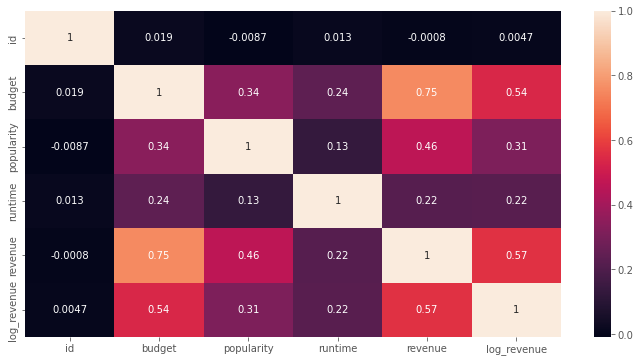

In [29]:
# Check numeric columns correlation
sns.heatmap(numeric_df.corr(), annot = True);

The strongest correlation is between `revenue` and `budget`. The other correlations above 0.5 are between `revenue` and `log_revenue` and `log_revenue` and `budget`: neither of them is surprising since the `log_revenue` column was obtained directly by transforming the `revenue` one. Otherwise, `revenue` also shows some mild correlation with `popularity`.

Let's start exploring some of these correlations in more details.

### Analyzing the `budget` Column

#### Distribution of Budget Values and Correlation with Revenues

The `budget` column uses the same unit of `revenue` (number of dollars). Since we elected the transformed `log_revenue` as our target variable, we should log transform the budgets too in order to obtain a feature in the same scale. For now, however, let's plot the distribution and the correlation between the non-transformed variables.     

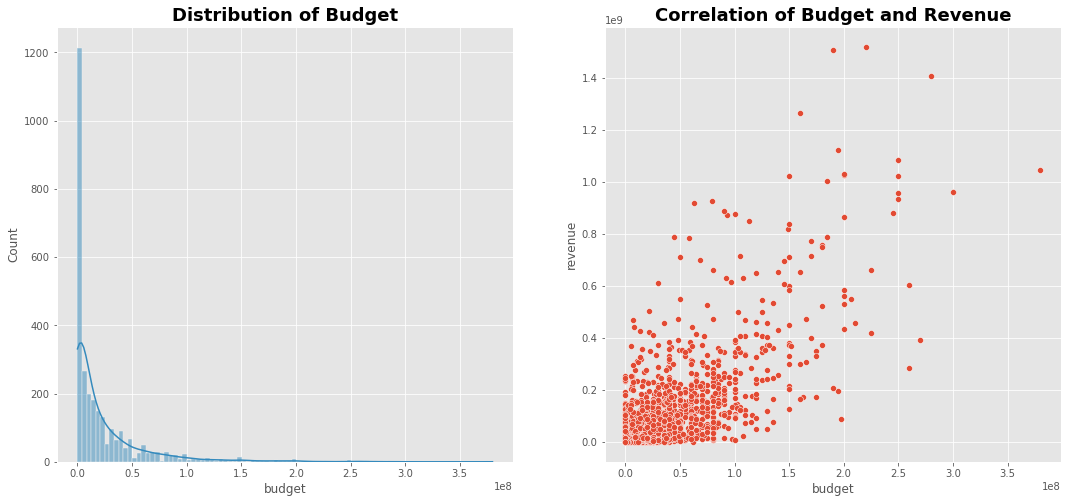

In [30]:
# Draw the distribution of the budget values and their correlation with revenues side by side
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw distribution of the budgets on the left
budget = sns.histplot(data = movies, x = "budget", ax = axs[0], kde = True);
_ = budget.set_title("Distribution of Budget");

# Draw `budget` vs. `revenue` scatterplot on the right
sns.scatterplot(data = movies_df, x = "budget", y = "revenue");
plt.title("Correlation of Budget and Revenue");

From the picture on the left, we see that the budget distribution too, just as the revenue one, is strongly skewed to the right. As a consequence, most datapoints in the scatterplot on the right accumulate in the lower left corner. 

The real issue here, however, is that some of these datapoints lie directly on the y-axis: this confirms the presence of a group of movies with a budget of \$0.

#### Exposing Invalid Budget Values 

Let's find out how many movies are listed as having a \\$0 budget.

In [31]:
# Count movies with $0 budget
(movies["budget"] == 0).sum()

778

Unfortunately, there are quite a few. Since we are at it, let's also look for other possibly wrong budget values; in order to do so, we need to determine a minimum budget under which it's unreasonable to believe one can make a movie. In [this](https://www.denofgeek.com/movies/top-50-modern-day-low-budget-movies/#:~:text=19) list of low-budget movies, there is one that was made with as little as \\$7,000. We'll be more lenient and set an initial threshold of \\$5,000.     

In [32]:
# Counts movies with budget lower than $5,000
low_budget = movies[movies["budget"] < 5000]

print("There are {} movies with budget lower than $5,000".format(low_budget.shape[0]))
low_budget["budget"].value_counts().sort_index()

There are 784 movies with budget lower than $5,000


0       778
1         1
8         1
10        1
93        1
113       1
2500      1
Name: budget, dtype: int64

The budget values go up to \\$113 somewhat uniformly, they suddenly jump to \\$2,500 and then nothing is found between that and \\$5,000. This suggests that \\$5,000 is probably a viable budget threshold. Let's decide whether we should include the least severe outlier we discovered above. 

In [33]:
# Check the movie with a $2,500 budget
movies_df[movies_df["budget"] == 2500]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1803,1804,NaN,2500,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0914382,en,Quiet City,Jamie is 21. She's from Atlanta. She's come to...,0.404753,/vn4iLUhXYAtoVXgXeQ2L7fFZZBr.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",3/12/07,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Quiet City,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 1000, 'character': 'Jamie', 'cred...","[{'credit_id': '52fe4712c3a36847f8121ef5', 'de...",15425


The [IMDB page](https://www.imdb.com/title/tt0914382/#:~:text=Budget,%242%2C500) of the movie (which we quickly reached using the the *imbdb_id* appearing in the row above) confirms both the budget and revenue values. Hence we save this row and update our budget threshold to \\$2,500. 

In [34]:
# Isolate the movies with invalid budget value, i.e., lower than $2,500
invalid_budget = movies[movies["budget"] < 2500]

We need to find a way to fix these movies. The easiest solution would be to drop the corresponding rows altogether; however, this would result in a loss of more than a quarter of the data (783 out of 2943 rows). To avoid this outcome, in order to retain as much information as possible, we prefer to replace the ill values through an appropriate imputation strategy.     

#### Figuring Out a Strategy to Replace the Invalid Budget Values

It is legitimate to expect that the budgets production companies (especially the smaller ones) allocate to make a movie don't have a big variance. Operating under this assumption, the option of replacing an invalid budget value with the median budget of movies produced by the same company seems valid.  

The information we need to carry out our strategy is contained in the `production_companies` column. Let's gather more information about this variable.

In [35]:
# Print null values count of the `production_companies` column
movies["production_companies"].isnull().sum()

145

In [36]:
# Count movies with invalid budget and missing `production_companies` value
invalid_budget[invalid_budget["production_companies"].isnull()].shape[0]

73

Out of the 783 movies with invalid budget, only 73 are missing a production company. This count doesn't take into consideration the fact that some of these movies might be produced by companies for which we have no other record. For this movies, our imputation strategy falls short. Nevertheless, we still believe there's a good margin of improvement so we go ahead with our plan.  

#### Cleaning the `production_companies` Column

Let's look at the format of the `production_companies` column.

In [37]:
# Print the first 3 values
movies["production_companies"].iloc[0]
movies["production_companies"].iloc[1]
movies["production_companies"].iloc[2]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

"[{'name': 'Walt Disney Pictures', 'id': 2}]"

"[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]"

The data is stored in lists of dictionaries, each one containing information about a single production company. These lists, however, are actually saved as strings. This is most likely the effect of a deserialization process performed by the API; in other words, the API pulled the data in JSON format and, when queried, it decoded the JSON into strings. These strings is what we see above.   

To turn the strings back into actual lists of dictionaries, the `json` package includes a method that allows to parse valid JSON syntax. However, we first need to make sure our strings do indeed match the JSON syntax. With this in mind, we define below a function that serves exactly this purpose.

In [38]:
import re
import json

def format_json(string):
    """
    Turns a deserialized JSON string into a list of dictionaries containing the original information.
    
    :param string: the string that needs to be formatted 
    :type string: str

    :return: a list of dictionaries with the same info contained in the original string
    """
    
    # Initialize the list of dictionaries
    dicts_list = []
    
    # Substitute double quotes with single quote. These double quotes could appear inside the dictionary values
    string = re.sub("\"", "'", string)
    
    # Substitute the single quotes that delimit the dictionary keys and values with double quotes to follow JSON syntax
    # We can recognize such single quotes because the characters that appear before or after them come in finitely many combos
    
    string = re.sub("(?<={)\'", "\"", string)    # Substitute a single quote preceded by "{" 
    string = re.sub("(?<=,\s)\'", "\"", string)  # Substitute a single quote preceded by ", "
    string = re.sub("(?<=:\s)\'", "\"", string)  # Substitute a single quote preceded by ": "
    string = re.sub("\'(?=:\s)", "\"", string)   # Substitute a single quote followed by ": "
    string = re.sub("\'(?=,\s)", "\"", string)   # Substitute a single quote followed by ", "
    string = re.sub("\'(?=})", "\"", string)     # Substitute a single quote followed by "}"
   
    # Remove the `\xa0` unicode characater (this signifies hard space and could appear in the dictionary values) 
    string = string.replace(u'\\xa0', u'')
      
    # Split the string at every closing bracket, i.e., at the end of every dictionary
    # This creates a list will all the JSON dictionaries (which at this point are still saved as strings)
    str_dicts = re.split(r"(?<=}).", string)
    
    # Loop through the dictionaries in the list we just created
    for str_dict in str_dicts[:-1]: # We skip the last element because it will always be an empty string
        
        # Remove any leftover leading and trailing foreign character
        str_dict = str_dict.strip("[, ]")
        # Parse the JSON dictionary converting into an actual dictionary
        real_dict = json.loads(str_dict)
        # Add the dictionary to the list which collects them all
        dicts_list.append(real_dict)
        
    return dicts_list            

In [39]:
# Clean the `production_companies` column parsing the JSON strings
movies["production_companies"] = movies["production_companies"].apply(lambda x : format_json(x) if pd.notnull(x) else x)

In [40]:
# Take a look at the result
movies["production_companies"].iloc[0]
movies["production_companies"].iloc[1]
movies["production_companies"].iloc[2]

[{'name': 'Paramount Pictures', 'id': 4},
 {'name': 'United Artists', 'id': 60},
 {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]

[{'name': 'Walt Disney Pictures', 'id': 2}]

[{'name': 'Bold Films', 'id': 2266},
 {'name': 'Blumhouse Productions', 'id': 3172},
 {'name': 'Right of Way Films', 'id': 32157}]

Since the *id* associated to each company doesn't add any important information, let's extract the production companies names from these lists.

In [41]:
# Extract the production companies' names
movies["production_companies"] = movies["production_companies"].apply(lambda x : [company["name"] for company in x]
                                                                      if type(x) == list else x)

Let's also create a column in which we keep only the main production company for each movie. To make our life easier, we assume the main company is the first one appearing in the list.

In [42]:
# Create a column with only the main production_company
movies["main_production_company"] = movies["production_companies"].apply(lambda x : x[0] if type(x) == list else x)

In [43]:
# Check the result
movies["main_production_company"]

0         Paramount Pictures
1       Walt Disney Pictures
2                 Bold Films
3                        NaN
4                        NaN
                ...         
2938            Warner Bros.
2939             Memfis Film
2940         New Line Cinema
2941            Jersey Films
2942        Lions Gate Films
Name: main_production_company, Length: 2943, dtype: object

#### Replacing Invalid Budget Values 

Now that we have obtained all the info we need, let's replace the invalid budget values using the stratgy we originally outlined. First of all, since we established all budgets below \\$2,500 are wrong and meaningless, let's replace them with null values.

In [44]:
# Replace the invalid budget values with NaNs
movies.loc[movies["budget"] < 2500, "budget"] = np.nan

Next we compute the budgets we will use to fill these null values we just introduced. Remember our strategy is to take the median budget of movies produced by each main production company.

In [45]:
# Initialize a dictionary to contain the median budgets
median_budgets = dict()

# Isolate the segment we want to fix
segment_to_fix = movies[(movies["budget"].isnull()) & (movies["main_production_company"].notnull())]

# Iterate over the unique companies which produced movies with invalid budgets 
for prod_comp in segment_to_fix["main_production_company"].unique():
    
    # Calculate the median budget of movies produced by the current production company 
    median_budget = movies.loc[movies["main_production_company"] == prod_comp, "budget"].median()
    
    # Update the dictionary with the median budget for the current production company
    median_budgets[prod_comp] = median_budget

Finally, we use the dictionary we just created to replace the invalid budget values.

In [46]:
# Replace the missing budgets with the median budgets we calculated (when possible)
movies["budget"] = movies[["budget", "main_production_company"]].apply(lambda row : 
                                                                       median_budgets[row["main_production_company"]] 
                                                                       if row.name in segment_to_fix.index
                                                                       else row["budget"], axis = 1)

In [47]:
# Check how many invalid budgets survived
movies["budget"].isnull().sum()

415

Unfortunately, we still have quite a large number of missing budgets. This must be due to the fact that many of the movies which had an invalid budget value are produced by companies for which we have no other record. Looking back, out of the 783 movies with ill budgets we had at the beginning, we were able to clean almost half of them, so we are pretty content. 

At this point we need to decide what to do with the remaining movies we were not able to fix. Since we saw the distribution of the budget variable is very skewed, we are worried replacing missing values with the mean or even median budget of the other movies could introduce bias in the data. Hence we prefer to drop the troubled datapoints. 

In [48]:
# Drop movies with missing budget
movies = movies.dropna(subset = ["budget"]).reset_index(drop = True)

In [49]:
print("We have {} datapoints remaining.".format(movies.shape[0]))

We have 2528 datapoints remaining.


#### Transforming the `budget` Column

Now that we have finally cleaned the revenue values, we can perform the same log transformation we used to normalize the `revenue` column. Since we either replaced or dropped any \$0 budget, we can be sure this operation won't introduce any new null value.

In [50]:
# Log transform the `budget` column
movies["log_budget"] = np.log(movies["budget"])

Let's see how this transformation affected the shape of the distribution.

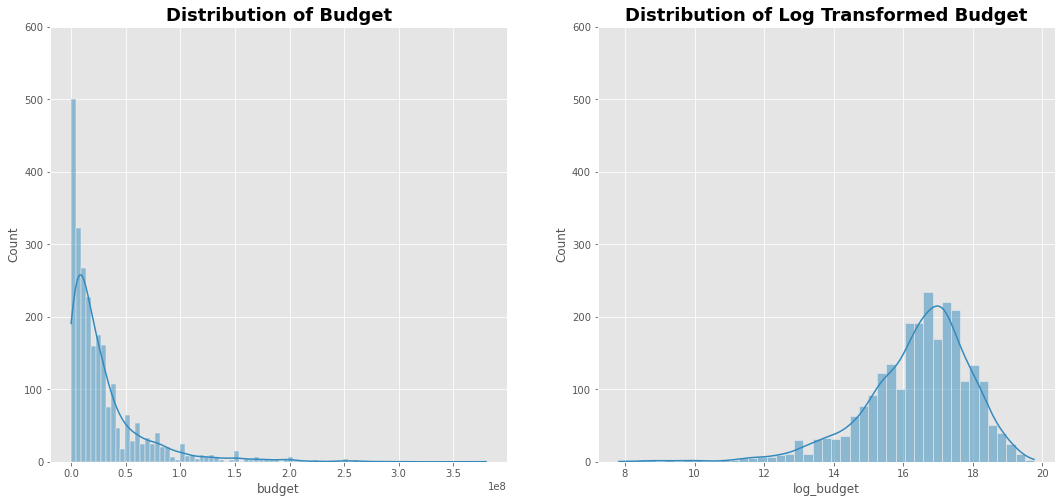

In [51]:
# Draw the distributions of the original and the log transformed budgets side by side
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw distribution of the original budgets on the left
budget = sns.histplot(data = movies, x = "budget", ax = axs[0], kde = True);
_ = budget.set_title("Distribution of Budget");

# Draw distribution of the log transformed budgets on the right
log_budget = sns.histplot(data = movies, x = "log_budget", ax = axs[1], kde = True);
_ = log_budget.set_title("Distribution of Log Transformed Budget")

# Use same scale on y-axis to facilitate comparison
for ax in axs:
    _ = ax.set(yticks = np.arange(0,700,100));

Even in this case, the log transformation helped reducing the skew of the distribution.

Let's also dobule check the correlation between the new, log transformed variables.

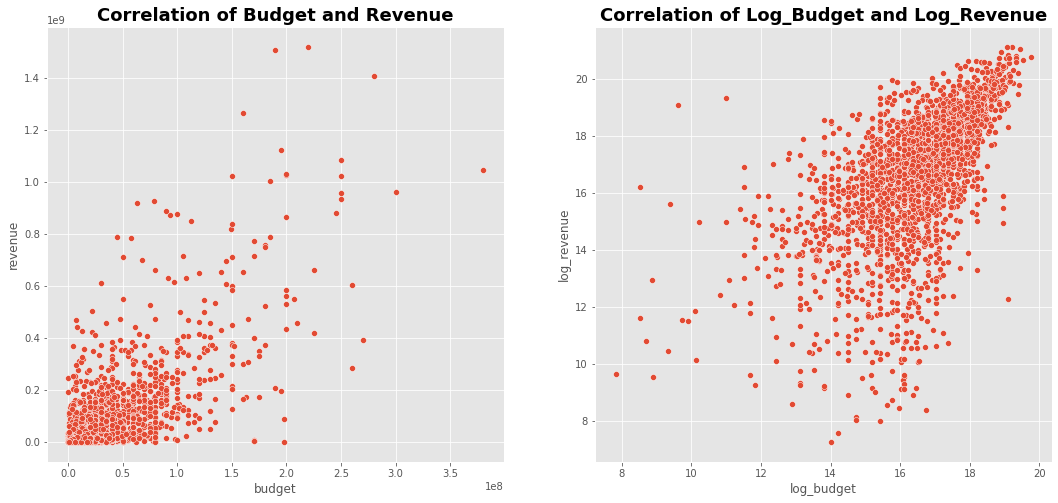

In [52]:
# Draw the correlation between the original and the log transformed budgets and revenues side by side
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw correlation of original budgets and revenues on the left
budget_revenue = sns.scatterplot(data = movies, x = "budget", y = "revenue", ax = axs[0]);
_ = budget_revenue.set_title("Correlation of Budget and Revenue");

# Draw correlation of log transformed budgets and revenues on the right
log_budget_revenue = sns.scatterplot(data = movies, x = "log_budget", y = "log_revenue", ax = axs[1]);
_ = log_budget_revenue.set_title("Correlation of Log_Budget and Log_Revenue")

Thanks to the log transformation, the datapoints in the plot on the right are not squished into the lower left corner, around the origin anymore but appear more spread out. As a consequence, it is also easier to recognize a linear correlation between the two columns. 

### Working with the `popularity` and `runtime` Columns

Let's move on to the two remaining numeric features, `popularity` and `runtime`.

In [53]:
# Print null values count in the `runtime` and `popularity`
movies[["runtime", "popularity"]].isnull().sum()

runtime       2
popularity    0
dtype: int64

In [54]:
# Print summary statistics
movies[["runtime", "popularity"]].describe()

,runtime,popularity
count,2526.000000,2528.000000
mean,109.099367,9.254648
std,21.835570,12.910059
min,0.000000,0.000308
25%,95.000000,5.144377
50%,105.000000,7.943562
75%,119.750000,11.341189
max,338.000000,294.337037


Besides the 2 "official" null values, the `runtime` column also has a minimum of 0 minutes which reveals the presence of other invalid values that need to be replaced. Let's check how many of them are there.

In [55]:
# Look for movies with 0 minutes runtime
(movies["runtime"] == 0).sum()

6

There are 6 movies with a runtime value of zero; adding the additional 2 missing values, it makes a total of 8 movies that need to be fix. Given this small amount, we could easily drop the corresponding rows. However, since movies' runtime are fairly easy to find online, we will input the true values manually.

Once again, we will gather the missing information from the movies' IMDB pages by appending the code that appears in the `imdb_id` column to the path https://www.imdb.com/title/.     

In [56]:
# Show the movies with invalid runtimes
invalid_runtimes = movies.loc[(movies["runtime"] == 0) | (movies["runtime"].isnull()), ["imdb_id", "title"]]
invalid_runtimes

,imdb_id,title
324,tt2550838,The Worst Christmas of My Life
777,tt2604346,¿Quién mató a Bambi?
825,tt2076251,La peggior settimana della mia vita
1111,tt1107828,Королёв
1794,tt0477337,Mechenosets
1932,tt0116485,Happy Weekend
2100,tt1620549,Hooked on the Game 2. The Next Level
2412,tt2456720,Tutto tutto niente niente


In [57]:
# Collect the true runtime values
# Unrelated curiosity: three of these movies are Italian and I actually saw them when I lived in Rome
true_runtimes = [86, 86, 93, 130, 108, 90, 86, 96]

In [58]:
# Replace the invalid runtimes with the true values
index_to_fix = invalid_runtimes.index
movies.loc[index_to_fix, "runtime"] = true_runtimes

In [59]:
# Make sure there's no missing runtime anymore
movies["runtime"].isnull().sum()

# Make sure there's no 0 runtime left
(movies["runtime"] == 0).sum()

0

0

Now that we have replaced the invalid values, we can check how runtimes correlate with movies' revenues.

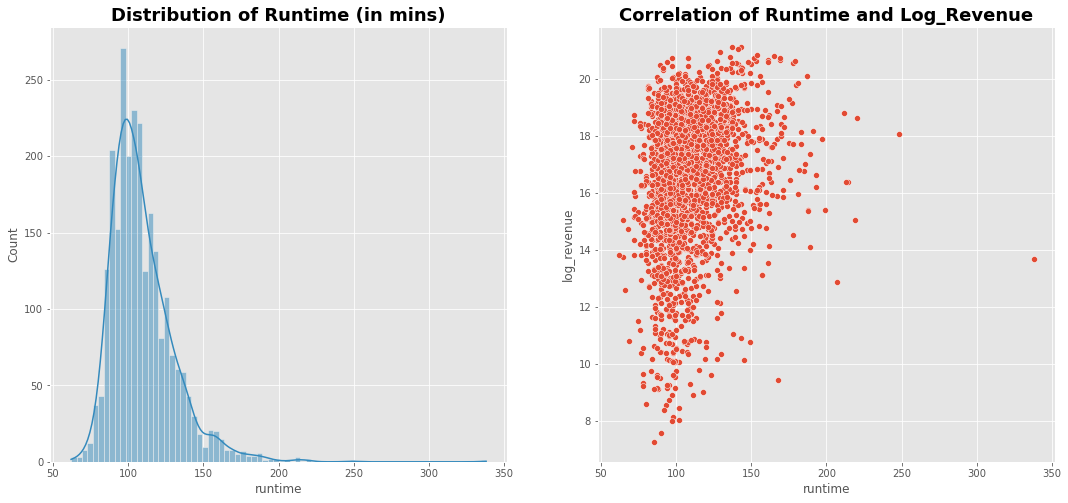

In [60]:
# Draw the distribution of the runtime values their correlation with log_revenues side by side
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw distribution of runtimes on the left
runtime = sns.histplot(data = movies, x = "runtime", ax = axs[0], kde = True);
_ = runtime.set_title("Distribution of Runtime (in mins)");

# Draw correlation of runtimes and log_revenues on the right
runtime_log_revenue = sns.scatterplot(data = movies, x = "runtime", y = "log_revenue", ax = axs[1]);
_ = runtime_log_revenue.set_title("Correlation of Runtime and Log_Revenue")

From the histogram on the left, we can see that most movies are shorter than 2.5 hrs and the most frequent runtimes fall just below the 100 minutes mark. As expected, given the correlation coefficients we have already printed, we do not observe any strong correlation with the log_revenue values. The scatterplot on the right, however, clearly shows the presence of a group of movies with high runtimes which exceed 200 minutes. In order to guarantee a good performance of the regression models, we get rid of these outliers.  

In [61]:
# Remove the `runtime` outliers
movies = movies[movies["runtime"] < 200]

Let's draw the same kind of plots for the `popularity` column.

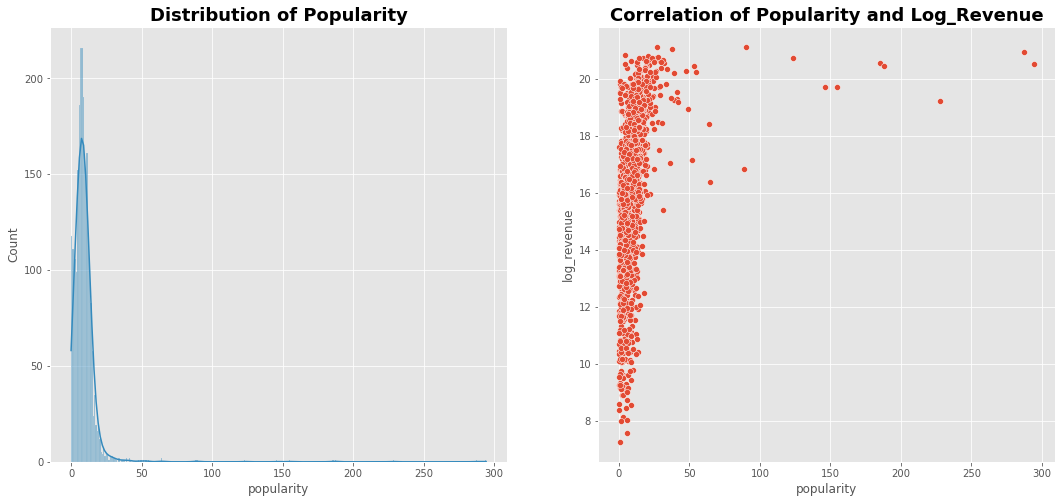

In [62]:
# Draw the distribution of the popularity scores and their correlation with log_revenues side by side
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw distribution of popularity scores on the left
popularity = sns.histplot(data = movies, x = "popularity", ax = axs[0], kde = True);
_ = popularity.set_title("Distribution of Popularity");

# Draw correlation of popularity scores and log_revenues on the right
popularity_log_revenue = sns.scatterplot(data = movies, x = "popularity", y = "log_revenue", ax = axs[1]);
_ = popularity_log_revenue.set_title("Correlation of Popularity and Log_Revenue")

The distribution of the popularity values has such a strong skew that the histogram on the left is nearly impossible to read out. From the scatterplot on the right, we infer that this skew is mostly due to the presence of outliers with popularity greater than 50 extending all the way up to nearly 300. 

Let's remove these outliers and look again at the distribution of the remaining datapoints.

In [63]:
# Remove the `popularity` outliers
# We save the result in a new variable because we haven't yet decided how to deal with the `popularity` column   
movies_temp = movies[movies["popularity"] < 50]

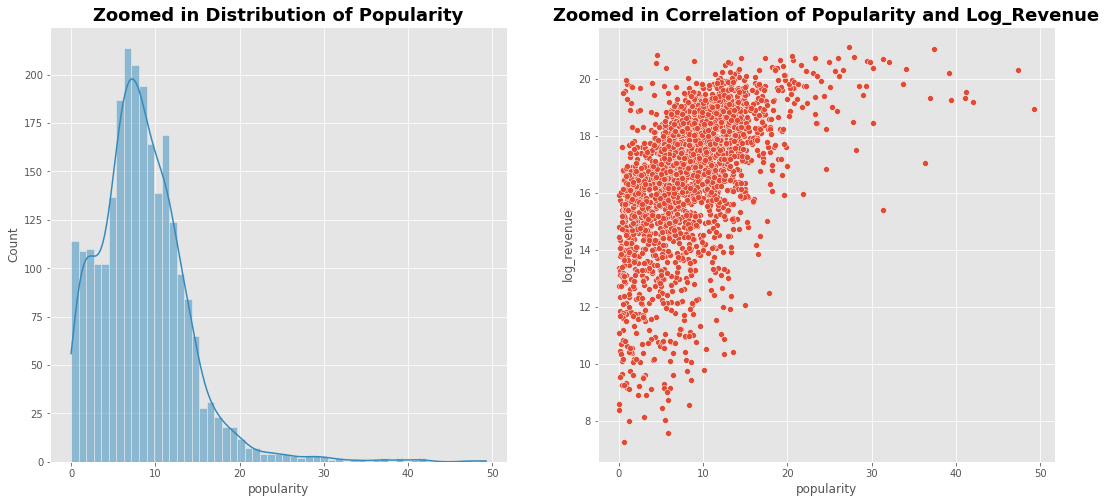

In [64]:
# Draw zoomed in distribution of the popularity scores and their correlation with log_revenues side by side
# Specifically, we leave out the outliers, i.e., movies with popularity > 50 
fig, axs = plt.subplots(1,2, figsize = (18,8))

# Draw zoomed in distribution of popularity scores on the left
popularity = sns.histplot(data = movies_temp, x = "popularity", ax = axs[0], kde = True);
_ = popularity.set_title("Zoomed in Distribution of Popularity");

# Draw zoomed in correlation of popularity scores and log_revenues on the right
popularity_log_revenue = sns.scatterplot(data = movies_temp, x = "popularity", y = "log_revenue", ax = axs[1]);
_ = popularity_log_revenue.set_title("Zoomed in Correlation of Popularity and Log_Revenue")

It looks like we still have a few outliers characterized by a popularity score above 30. There is only a handful of them hence, just to be safe, we drop those too. 

In [65]:
# Drop `popularity` outliers by setting threshold at 30
movies = movies[movies["popularity"] < 30].reset_index(drop = True)

In [66]:
print("We have {} datapoints remaining.".format(movies.shape[0]))

We have 2488 datapoints remaining.


### Establishing the Numeric Features

We are done analyzing the numeric features; let's put them in a list so we don't lose track of them.

In [67]:
numeric_features = ["budget", "log_budget", "runtime", "popularity"]

<a class="anchor" id="section_2_2"></a>

## Trimming the Non-Numeric Features

Let's now focus on the non-numeric columns which, as we've seen, make up the majority of the data we have available. We first need to decide which of these columns to use for making predictions; then, we'll need to do some feature engineering in order to encode the information into numeric values that we can feed to the regression models. 

In [68]:
# Select the non-numeric columns and make them the initial set of non-numeric features
non_numeric_df = movies.select_dtypes(exclude = [np.number])
non_numeric_features = non_numeric_df.columns

In [69]:
print("There are {} non-numeric columns. They are:\n{}".format(len(non_numeric_features), non_numeric_features))

There are 19 non-numeric columns. They are:
Index(['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast',
       'crew', 'main_production_company'],
      dtype='object')


In [70]:
# Print the first three rows and all non-numeric columns
non_numeric_df.head(3)

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew,main_production_company
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",Paramount Pictures
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",Walt Disney Pictures
2,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",NaN


In [71]:
# Print null values count
non_numeric_df.isnull().sum()

belongs_to_collection      1957
genres                        5
homepage                   1686
imdb_id                       0
original_language             0
original_title                0
overview                      6
poster_path                   1
production_companies         72
production_countries         26
release_date                  0
spoken_languages              8
status                        0
tagline                     373
title                         0
Keywords                    175
cast                          9
crew                         11
main_production_company      72
dtype: int64

In [72]:
# Print some summary statistics
non_numeric_df.describe()

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew,main_production_company
count,531,2483,802,2488,2488,2488,2482,2487,2416,2462,2488,2480,2488,2115,2488,2313,2479,2477,2416
unique,372,790,799,2488,32,2470,2482,2487,1969,269,2046,351,2,2112,2468,2266,2476,2477,715
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Sahara,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,[Paramount Pictures],"[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Fantastic Four,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",Universal Pictures
freq,16,199,3,1,2203,2,1,1,49,1529,5,1545,2487,3,2,19,4,1,164


### Removing Useless Features

First of all we spot some columns that are of no help for our regression purposes: both `imdb_id` and `poster_path` contain path to webpages and are not useful for making predictions. We can remove these columns from the list of features we'll use.

In [73]:
# Remove the `imdb_id` and `poster_path` columns from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["imdb_id", "poster_path"])

The `title` and `original_title` columns too are helpful to identify and locate a movie but have very little predictive power. The only helpful piece of information a movie title could convey is whether the movie is part of a collection/series; but this kind of clue is already provided by the `belongs_to_collection` column.   

For these reasons, we remove `title` and `original_title` from the list of features.

In [74]:
# Remove the `title` and `original_title` columns from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["title", "original_title"])

### Removing Redundant Features

The `spoken_languages` column contains lists (using the same JSON-syntax strings we have already encountered) of *all* languages that are used throughout each movie. This information is more granular than the one contained in the `original_language` column (which is, the *main* language used in the movie) but ends up being redundant. Hence, we drop this feature as well.  

In [75]:
# Remove the `spoken_languages` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["spoken_languages"])

Furthermore, the information contained in the `production_countries` is kind of a mix of what can already be found in `production_companies` and `original_language`: we go ahead and remove this feature too.

In [76]:
# Remove the `production_countries` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["production_countries"])

Finally, we have already transformed the `production_companies` column and obtained more manageable data by extracting each movie's *main* production company. As a consequence, the former column is redundant and can be removed. 

In [77]:
# Remove the `production_companies` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["production_companies"])

In [78]:
print("The remaining non-numeric features are:\n", non_numeric_features)

The remaining non-numeric features are:
 Index(['belongs_to_collection', 'genres', 'homepage', 'original_language',
       'overview', 'release_date', 'status', 'tagline', 'Keywords', 'cast',
       'crew', 'main_production_company'],
      dtype='object')


### Removing Hard to Process Features

Both the `overview` and `tagline` columns contain strings which help describing each movie. These variables are neither numeric nor qualitative and it would be hard to find a method that allows to transform them into viable features. Hence, we prefer to exclude these columns from the list of features we are crafting.  

In [79]:
# Remove the `overview` and `tagline` columns from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["overview", "tagline"])

Finally, the `Keywords`, `cast` and `crew` columns all contain potentially helpful information. For instance, it is logical to expect that the allure of a famous actor or the artistry of a talented director can boost a movie's revenue. We could treat these columns as qualitative variables by considering each keyword, cast and crew member as a different categorical level. However, even if we limited the cast members to just the leading roles and the crew members to just the directors, this would realistically result in an exorbitant number of levels which would be hard to handle.

For these reasons, we prefer to first train some models leaving these features out. After evaluating the accuracy of the predictions, we can always go back and strive to incorporate this information using some clever approach.      

In [80]:
# Remove the `Keywords`, `cast` and `crew` columns from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["Keywords", "cast", "crew"])

In [81]:
print("The remaining non-numeric features are:\n", non_numeric_features)

The remaining non-numeric features are:
 Index(['belongs_to_collection', 'genres', 'homepage', 'original_language',
       'release_date', 'status', 'main_production_company'],
      dtype='object')


In [82]:
# Print summary statistics of the remaining features
non_numeric_df = movies[non_numeric_features]
non_numeric_df.describe()

,belongs_to_collection,genres,homepage,original_language,release_date,status,main_production_company
count,531,2483,802,2488,2488,2488,2416
unique,372,790,799,32,2046,2,715
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,en,9/10/10,Released,Universal Pictures
freq,16,199,3,2203,5,2487,164


Before moving on, let's acknowledge that issues similar to the ones we raised above involve some of the remaining features too (for instance, `genres`, `main_production_companies` and `original_language`). However, these columns should yield a smaller number of categorical levels; we feel confident we can find a good strategy to organize these levels and then, using one-hot encoding, we can obtain valic numeric variables.

### Removing Features with Low Variance

From the window above, we see that the `status` column contains only two distinct values, one of which appears once. It's very unlikely that this distinction bears any relevance but, for the sake of completeness, let's still check the *status* of the unique non-uniform datapoint.

In [83]:
# Check the only datapoint with non-uniform status
movies[movies["status"] != "Released"][["status"] + [col for col in movies.columns if col != "status"]]
                                                     # We make the `status` column appear in first position for ease of reading

,status,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,log_revenue,main_production_company,log_budget
1337,Rumored,1619,NaN,891000.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,/4j9U7QMT5D5HhUoIsoAI1niVqz8.jpg,NaN,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,12.341477,NaN,13.7001


It's not clear why this movie is marked as *Rumored* even if it actually came out in 1998; but we got the confirmation the `status` column doesn't add any kind of precious knowledge. Therefore, we can remove it entirely from our dataframe.

In [84]:
# Drop the `status` column from the entire dataframe
movies = movies.drop(columns = ["status"])

# Remove the `status` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["status"])

In [85]:
print("The remaining non-numeric features are:\n", non_numeric_features)

The remaining non-numeric features are:
 Index(['belongs_to_collection', 'genres', 'homepage', 'original_language',
       'release_date', 'main_production_company'],
      dtype='object')


In [86]:
# Print null values count
movies[non_numeric_features].isnull().sum()

belongs_to_collection      1957
genres                        5
homepage                   1686
original_language             0
release_date                  0
main_production_company      72
dtype: int64

<a class="anchor" id="section_2_3"></a>

## Engineering the Non-Numeric Features

We have done a good job trimming the list of non-numeric features leaving only the ones that can be useful. Now we need to perform some feature engineering to transform these columns into numeric variables that we can use in regression modeling. In doing this, we also need to figure out how to handle the null values which, as showed by the window above, are copious. 

### Dichotomizing the `belongs_to_collection` and `homepage` Columns

The columns with the greatest number of null values are `belongs_to_collection` and `homepage`. However, in this case, rather than actual missing values, NaNs denote the absence of the related information. More specifically, if a movie is not part of a collection/series or doesn't have an official webpage, then the corresponding row will have a null value in the `belongs_to_collection` and `homepage` columns respectively.

Let's have a visual confirmation of this phenomen by printing a few rows. 

In [87]:
# Print a few movies which have not/have a null value in the `belongs_to_collection` column 
# By locating these movies on IMDB one can check that NaNs are used to denote movies which are not part of a collection
movies.loc[movies["belongs_to_collection"].notnull(), ["imdb_id", "title", "belongs_to_collection"]].head(3)
movies.loc[movies["belongs_to_collection"].isnull(), ["imdb_id", "title", "belongs_to_collection"]].head(3)

,imdb_id,title,belongs_to_collection
0,tt2637294,Hot Tub Time Machine 2,"[{'id': 313576, 'name': 'Hot Tub Time Machine ..."
1,tt0368933,The Princess Diaries 2: Royal Engagement,"[{'id': 107674, 'name': 'The Princess Diaries ..."
5,tt0117110,Muppet Treasure Island,"[{'id': 256377, 'name': 'The Muppet Collection..."


,imdb_id,title,belongs_to_collection
2,tt1821480,Kahaani,NaN
3,tt0093743,Pinocchio and the Emperor of the Night,NaN
4,tt0431021,The Possession,NaN


In [88]:
# Print a few movies which have not/have a null value in the `homepage` column 
# By locating these movies on IMDB one can check that NaNs are used to denote movies which do not have an official website
movies.loc[movies["homepage"].notnull(), ["imdb_id", "title", "homepage"]].tail(3)
movies.loc[movies["homepage"].isnull(), ["imdb_id", "title", "homepage"]].tail(3)

,imdb_id,title,homepage
2482,tt0362227,The Terminal,http://www.theterminal-themovie.com/
2486,tt0343135,Along Came Polly,http://www.alongcamepolly.com/
2487,tt1600195,Abduction,http://www.abductionthefilm.com/


,imdb_id,title,homepage
2483,tt0105327,School Ties,NaN
2484,tt0109403,Chasers,NaN
2485,tt0116908,The Long Kiss Goodnight,NaN


Given the description above, these two columns look perfectly suitable for being transformed into dichotomous variables. In fact, rather than the specific collection or link to the movie's website, we are mostly interested to know *if* a movie is part of a collection and *if* a movie has a website.

Being more specific, we'll replace all the null values in these columns with 0s (to denote the absence of the variable) and we'll replace all the other values with 1s (to denote the presence of the variable). 

In [89]:
# Dichotomize `belongs_to_collection` and `homepage` columns
movies["belongs_to_collection"] = np.where(movies["belongs_to_collection"].isnull(), 0, 1)
movies["homepage"] = np.where(movies["homepage"].isnull(), 0, 1)

In [90]:
# Check the updated values
movies["belongs_to_collection"].value_counts(dropna = False)
movies["homepage"].value_counts(dropna = False)

0    1957
1     531
Name: belongs_to_collection, dtype: int64

0    1686
1     802
Name: homepage, dtype: int64

The values have been updated and the number of 0s match the null values count we had prior the transformation. 

Before moving on, let's actually check how the target values depend on the variables we just created. In other words, we want to see if there's a difference between the revenues of movies which are/are not part of a collection and which have/have not an official website. 

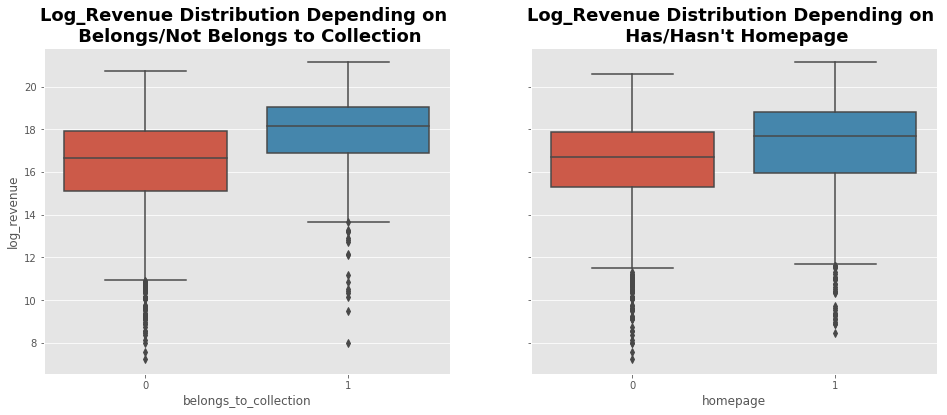

In [91]:
fig, axs = plt.subplots(1,2, figsize = [16, 6])

# Draw distribution of log_revenues based on the `belongs_to_collection` value
sns.boxplot(data = movies, x = "belongs_to_collection", y = "log_revenue", ax = axs[0]);
axs[0].set_title("Log_Revenue Distribution Depending on \n Belongs/Not Belongs to Collection");

# Draw distribution of log_revenues based on the `homepage` value
sns.boxplot(data = movies, x = "homepage", y = "log_revenue", ax = axs[1]);
axs[1].set_title("Log_Revenue Distribution Depending on \n Has/Hasn't Homepage");

# To improve data to ink ratio, we only draw the y-axis label and y-tick labels on the first plot
axs[1].set(ylabel= "", yticklabels = []);

We can see that movies which are part of a collection or have a website do tend to have higher revenues than movies which don't. The difference is not negligible either since the median of the blue distributions (those ones which denote the presence of the variable) is in both cases around the upper quartile of the corresponding red distributions. 

These observations might not come as a surprise and do follow common sense (for instance, if a movie got approved for a sequel, it means the previous installments were box office hits so it is more probable it will generate a high gross). For our purposes, the figure above serves as a validation that the `belongs_to_collection` and `homepage` variables can help us predict movie revenues more accurately. Hence, we keep them both.

In [92]:
# Update the list of features that are left to treat
features_to_treat = non_numeric_features.drop(["belongs_to_collection", "homepage"])

In [93]:
print("The remaining non-numeric features to treat:\n", features_to_treat)

The remaining non-numeric features to treat:
 Index(['genres', 'original_language', 'release_date',
       'main_production_company'],
      dtype='object')


### Analyzing the `genres` Column

#### Cleaning the Values

The next column we take into consideration is `genres`. A priori, before even looking at the data, it's normal to believe that a movie's genre can have quite a big impact on its box office gross: more popular genres attract more people hence have a better chance of making money. Given this premise, we are eager to include this variable in the list of features we use for training models; however, we need to decide how to encode the different genres as numeric values.     

Baby steps first: let's inspect how the values in the `genres` column are stored.

In [94]:
# Print the first two values of the `genres` column
movies.iloc[0]["genres"]
movies.iloc[1]["genres"]

"[{'id': 35, 'name': 'Comedy'}]"

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [95]:
# Print the null values count
movies["genres"].isnull().sum()

5

We recognize the same JSON-syntax strings that we found in the `production_companies` column. We can clean these values using the same function we defined back then. As usual, we will make sure to disregard null values.

In [96]:
# Clean the `genres` column parsing the JSON strings
movies["genres"] = movies["genres"].apply(lambda x : format_json(x) if pd.notnull(x) else x)

In [97]:
# Take a look at the result
movies["genres"]

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
3       [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
4       [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
                              ...                        
2483                        [{'id': 18, 'name': 'Drama'}]
2484    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2485    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2486    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2487    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 2488, dtype: object

The last step consists in extracting the genres names from each dictionary in each list.

In [98]:
# Extract the genres names
movies["genres"] = movies["genres"].apply(lambda x : [genre["name"] for genre in x] if type(x) == list else x)

In [99]:
# Check the result
movies["genres"]

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                        [Thriller, Drama]
3           [Animation, Adventure, Family]
4                       [Horror, Thriller]
                       ...                
2483                               [Drama]
2484                     [Comedy, Romance]
2485    [Crime, Action, Mystery, Thriller]
2486                     [Comedy, Romance]
2487           [Thriller, Action, Mystery]
Name: genres, Length: 2488, dtype: object

In [100]:
# Make sure the number of null values hasn't changed
movies["genres"].isnull().sum()

5

#### Filling in the Null Values

Before we analyze the genres in more details, let's treat the null values. Since there are only 5 of them, we'll fill in the missing information locating each movie on IMDB with the help of the *imdb_ids*.

In [101]:
# Show the movies with missing genres
missing_genres = movies.loc[movies["genres"].isnull(), ["imdb_id", "title", "release_date"]]
missing_genres

,imdb_id,title,release_date
385,tt0349159,"The Book of Mormon Movie, Volume 1: The Journey",9/12/03
1341,tt0261755,Jackpot,7/26/01
1502,tt0110289,"Ryaba, My Chicken",10/1/94
2001,tt0984177,Amarkalam,8/25/99
2401,tt1766044,Rita's Last Fairy Tale,11/1/12


In [102]:
# Collect the true genres values
true_genres = np.array([["Adventure"], ["Drama", "Comedy"], ["Comedy"],
                       ["Action", "Drama", "Romance"], ["Drama", "Fantasy", "Mystery"]], dtype = "object")

In [103]:
# Replace the missing genres with the true values
index_to_fix = missing_genres.index
movies.loc[index_to_fix, "genres"] = true_genres

In [104]:
# Make sure there's no missing value left
movies["genres"].isnull().sum()

0

#### Analyzing the Different Genres

Let's take a look at all the unique genres that appear.

In [105]:
# Get a list of the unique genres
unique_genres = np.unique([genre for genres in movies["genres"] for genre in genres])
print("There are {} unique genres. They are:\n {}".format(len(unique_genres), unique_genres))

There are 20 unique genres. They are:
 ['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


Before visualizing each genre's frequency, we need to decide what counting method to use. More specifically, we need to take into consideration the fact that many movies are assigned multiple genres. We had a similar situation when we cleaned the `production_companies` column and back then we decided to only keep the first value (the "main" production company). 

Here, however, we are worried this same strategy would result in an hefty loss of granularity: oftentimes, confining a movie to just one genre doesn't make it justice; in fact, one might argue that the ability of blending different atmospheres, styles and themes typical of different genres is a main success factor for a movie.

For these reasons, we count genres by allowing multiple genres for a single movie. 

In [106]:
# Create a series containing all genres from all movies
stacked_genres = pd.Series([genre for genres in movies["genres"] for genre in genres], name = "genres")

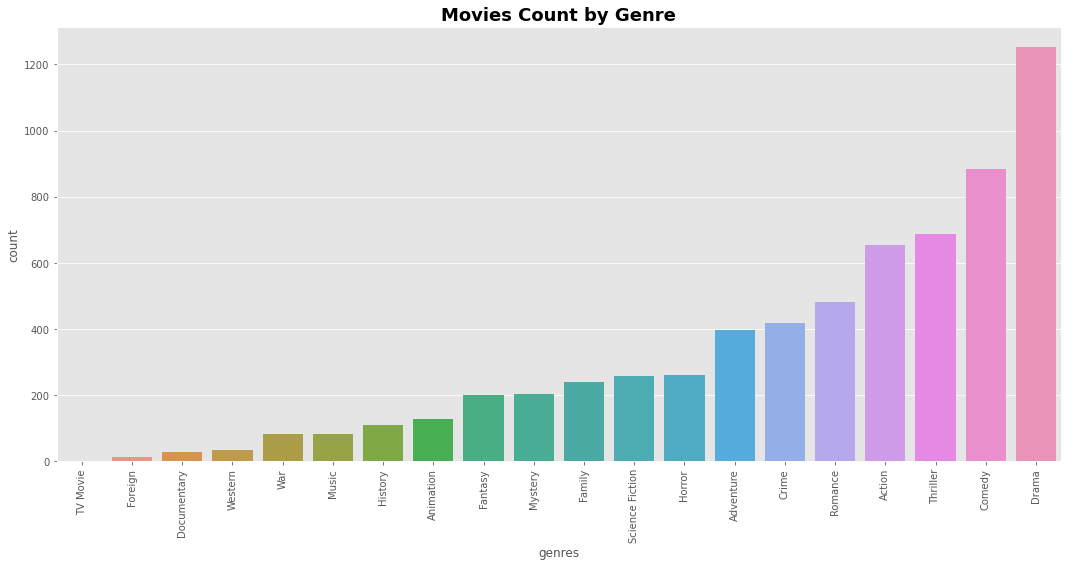

In [107]:
# Plot the genres frequencies

plt.figure(figsize = [18,8]);

sns.countplot(x = stacked_genres, order = stacked_genres.value_counts(ascending = True).index)
plt.xticks(rotation = 90);
plt.title("Movies Count by Genre");

*Drama* is by far the most frequent genre; *Comedy* comes second followed by *Thriller* and *Action* which are almost tied for third place. There is a relatively large gap between the fourth and fifth place but then we find another group of three genres (in order, *Romance*, *Crime* and *Adventure*) with similar counts.

Let's also compare what are the most followed genres using the movies' popularity scores. Once again, we will take into consideration the fact that a movie can have multiple genres.

In [108]:
# Create a series with popularity scores repeated according to movies with multiple genres
stacked_popularity = movies["popularity"].repeat(movies["genres"].apply(len)).reset_index(drop = True)

In [109]:
# Create a dataframe with the stacked genres and repeated popularity scores
# For each movie, this allows us to assign its popularity score to all of its genres
genres_popularity = pd.concat([stacked_genres, stacked_popularity], axis = 1)

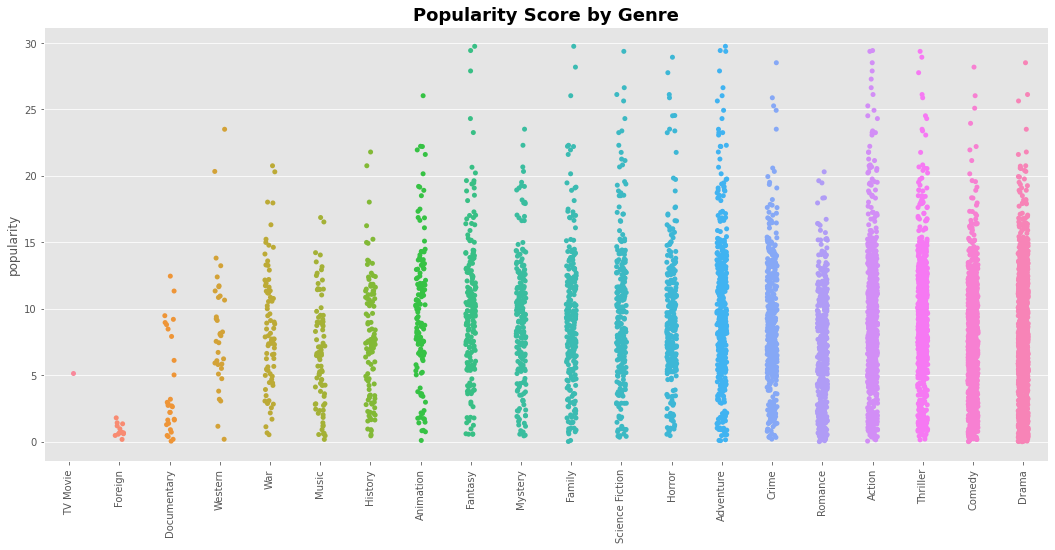

In [110]:
plt.figure(figsize = [18,8]);

# Plot the popularity score by genre
sns.stripplot(data = genres_popularity, x = "genres", y = "popularity",
              order = stacked_genres.value_counts(ascending = True).index); # Order the genres by movie count

plt.xticks(rotation = 90);
plt.xlabel("")
plt.title("Popularity Score by Genre");

It seems like *Thriller*, *Action*, *Adventure* and *Science Fiction* are the genres with the highest number of popular movies. It's somewhat interesting to see that even though *Romance* is the fifth most frequent genre, none of its movies are popular.

Let's also check what are the genres which yield the highest revenues.

In [111]:
# Create a series with log_revenues repeated according to movies with multiple genres
stacked_revenues = movies["log_revenue"].repeat(movies["genres"].apply(len)).reset_index(drop = True)

In [112]:
# Create a dataframe with the stacked genres and repeated log_revenues
# For each movie, this allows us to assign its revenue to all of its genres
genres_revenues = pd.concat([stacked_genres, stacked_revenues], axis = 1)

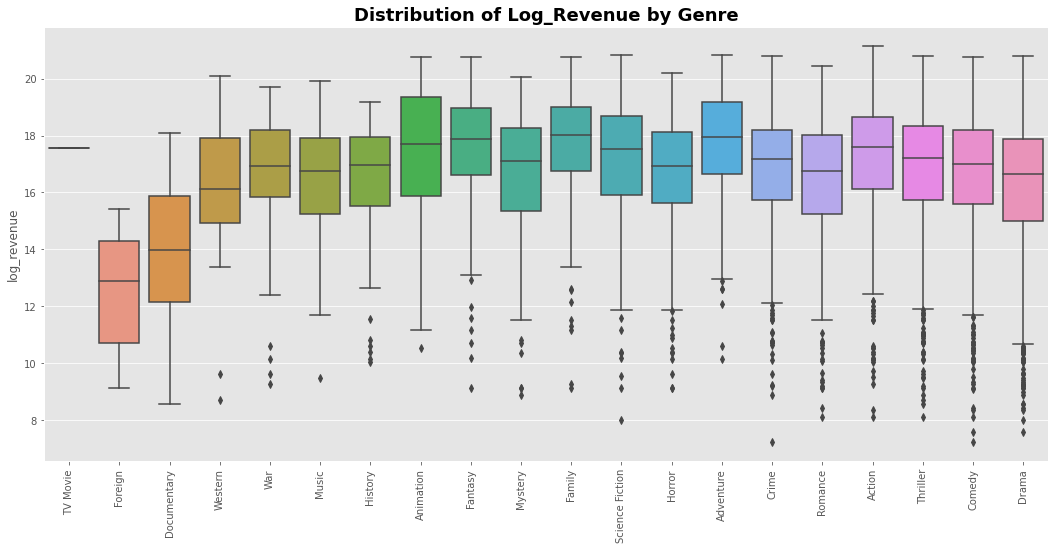

In [113]:
# Plot the distributions of revenues by genre

plt.figure(figsize = [18,8]);

sns.boxplot(data = genres_revenues, x = "genres", y = "log_revenue",
            order = stacked_genres.value_counts(ascending = True).index); # Order the genres by movie count; 

plt.xticks(rotation = 90);
plt.xlabel("")
plt.title("Distribution of Log_Revenue by Genre");

Many of the most frequent genres (particularly *Drama* and *Comedy*) have median box office gross which ranks below other less frequent genres. Among the genres with top revenues we spot a couple which were also dominant in terms of popularity (*Adventure* and *Science Fiction*) and three *new* ones which we haven't mentioned so far (*Fantasy*, *Animation* and *Family*).    

#### One-Hot Encoding the `genres` Column

It's finally time to decide how to transform the `genres` variable into a numeric one. The easiest choice is to use one-hot encoding and that's what we'll do. This still leaves the problem of choosing how many and which categorical levels to use. Referring to the plots we drew above, we can try to group together different genres based on their frequency or popularity.

This, however, would cause a loss of granularity in the data and could eventually yield worse model performances. For this reason, we rather keep all genres; hence we perform one-hot encoding by creating a dummy column for each genre. Once again, we consider the fact that a movie can fall into multiple genres hence, in the end, the same row can have a 1 appearing in many of these dummy columns. 

In [114]:
# For each genre create a dummy column with the one hot encoding technique
for genre in unique_genres:
    movies["genre_" + genre.lower().replace(" ", "_")] = movies["genres"].apply(lambda x : 1 if genre in x else 0)

In [115]:
# Update the list of non-numerical features we'll use
non_numeric_features = non_numeric_features.append(movies.columns[-20:])

In [116]:
# Remove the `genres` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["genres"])

In [117]:
# Update the list of features that are left to treat
features_to_treat = features_to_treat.drop("genres")

In [118]:
print("The remaining non-numeric features to treat:\n", features_to_treat)

The remaining non-numeric features to treat:
 Index(['original_language', 'release_date', 'main_production_company'], dtype='object')


### Extracting Information from the `release_date` Column

#### Formatting the `release_date` Column

We believe the `release_date` column can provide helpful information in connection with movies' revenue. For instance, it is legitimate to expect that, as a consequence of inflation, the price of movie tickets (hence their box office grosses too) has increased over time; moreover, it's not a secret that production companies favor specific times of the year (like the holiday season) for releasing awaited and hyped movies.

Before deciding exactly what kind of dates-related info to use in our regression models, let's see how values are stored in the `release_date` column.  

In [119]:
# Print the `release_date` column dtype
movies["release_date"].dtype

dtype('O')

In [120]:
# Explore values of the `release_date` column 
movies["release_date"]

0        2/20/15
1         8/6/04
2         3/9/12
3         8/6/87
4        8/30/12
          ...   
2483     9/18/92
2484     4/22/94
2485    10/11/96
2486     1/16/04
2487     9/22/11
Name: release_date, Length: 2488, dtype: object

In [121]:
# Print the null values count 
movies["release_date"].isnull().sum()

0

The `release_date` column is of dtype *object*. In fact, the dates are saved as strings in the format *MM/DD/YY*. To make working with dates more handy, let's convert this series into datetimes.

In [122]:
# Convert the `release_date` column to datetime
# We let pandas infer the datetime format since the format for months as decimal numbers is platform specific
movies["release_date"] = pd.to_datetime(movies["release_date"], infer_datetime_format = True)

In [123]:
# Check the new values
movies["release_date"].sort_values()

2093   1972-01-13
1559   1972-03-12
1756   1972-06-29
680    1972-08-01
1400   1972-09-13
          ...    
1996   2071-06-29
1344   2071-10-09
290    2071-12-13
1907   2071-12-18
2132   2071-12-29
Name: release_date, Length: 2488, dtype: datetime64[ns]

It looks like pandas assigned the day and month values correctly but messed up some of the years; in fact, some dates carry the year 2071 (which is in the future). With a little bit of thought, it's easy to pinpoint the issue which caused this error: the original strings showed years without century as zero-padded decimal numbers. But this is ambiguous since, for example, the year "71" could be interpreted both as 1971 and as 2071.   

From what the data represents, we do know that any year past the current one shouldn't appear; however, the machine cannot have this kind of knowledge. Hence, we need to figure out where is the cutoff for these wrong years. To make the search easier, let's create a `release_year` column.

In [124]:
# Create a `release_year` column
movies["release_year"] = movies["release_date"].apply(lambda x : x.year)

In [125]:
# Get the unique years and print them in ascending order
years = movies["release_year"].unique()
np.sort(years)

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2021, 2024, 2026, 2027, 2028, 2031, 2032, 2033, 2035,
       2036, 2038, 2039, 2040, 2042, 2043, 2044, 2045, 2047, 2048, 2049,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071],
      dtype=int64)

The most recent year that is already in the past is 2021. Let's do an explicit search to decide whether this value is legit or actually denotes movies released in 1921.

In [126]:
# Look for movies released in 2021 
movies[movies["release_year"] == 2021]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,Keywords,cast,crew,revenue,log_revenue,main_production_company,log_budget,genre_action,genre_adventure,genre_animation,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_foreign,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science_fiction,genre_tv_movie,genre_thriller,genre_war,genre_western,release_year
1464,1764,0,250000.0,"[Comedy, Drama]",0,tt0012349,en,The Kid,Considered one of Charlie Chaplin's best films...,8.168456,/drgMcyTsySQBnUPGaBThCHGdlWT.jpg,"[Charles Chaplin Productions, First National P...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-01-21,68.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6 reels of Joy.,The Kid,"[{'id': 290, 'name': 'angel'}, {'id': 1252, 'n...","[{'cast_id': 10, 'character': 'A Tramp', 'cred...","[{'credit_id': '52fe43269251416c75005605', 'de...",2500000,14.731801,Charles Chaplin Productions,12.429216,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021


It's a Charlie Chaplin movie so it's definitely from the last century.

Now we officially know that, in order to fix the invalid release years, we need to subtract a full century to all years greater or equal than 2021. That's what we do next.

In [127]:
# Fix the wrong years directly in the `release_date` column
from dateutil.relativedelta import relativedelta

movies["release_date"] = movies["release_date"].apply(lambda x : x - relativedelta(years = 100) if x.year>= 2021 else x)

In [128]:
# Fix the wrong years in the `release_year` column
movies["release_year"] = movies["release_year"].apply(lambda x : x - 100 if x >= 2021 else x)

In [129]:
# Make sure the invalid years are now correct
years = movies["release_year"].unique()
np.sort(years)

array([1921, 1924, 1926, 1927, 1928, 1931, 1932, 1933, 1935, 1936, 1938,
       1939, 1940, 1942, 1943, 1944, 1945, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

#### Exploring Movies' Release Years

Now that we have a column with the explicit release years, let's track the evolution of some movies' info through time. First of all, let's look at movies count by year.

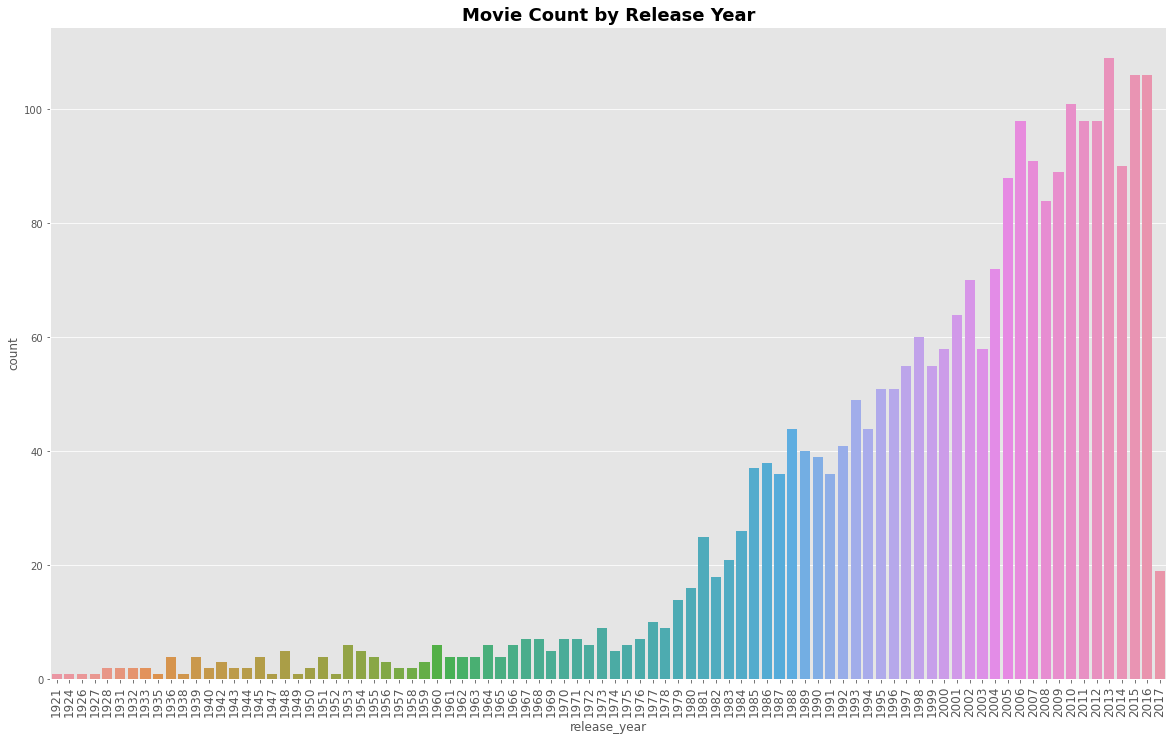

In [130]:
# Display the movie count by release year

plt.figure(figsize = [20, 12])

sns.countplot(data = movies, x = "release_year")
plt.xticks(fontsize = 12, rotation = 90);
plt.title("Movie Count by Release Year");

The number of movies released each year has increased across time. The most prolific year is 2013; back then, about 110 movies hit theathers. We also notice that sometimes a year's movie count is much smaller compared to what comes immediately before and after it (for example, in 2003 and 2014). It would be interesting to investigate whether this circumstance is fortuitous or if it's caused by specific events that impacted the film industry in that period.   

Let's now try to understand how our target variable depends on the release years. In particular, we will visualize the evolution of the average movie revenue. To get a more complete picture, we will also plot the same information for the budget values.

In [131]:
# Prepare the data to plot
financials_by_year = movies.groupby("release_year").mean()[["budget", "revenue"]]

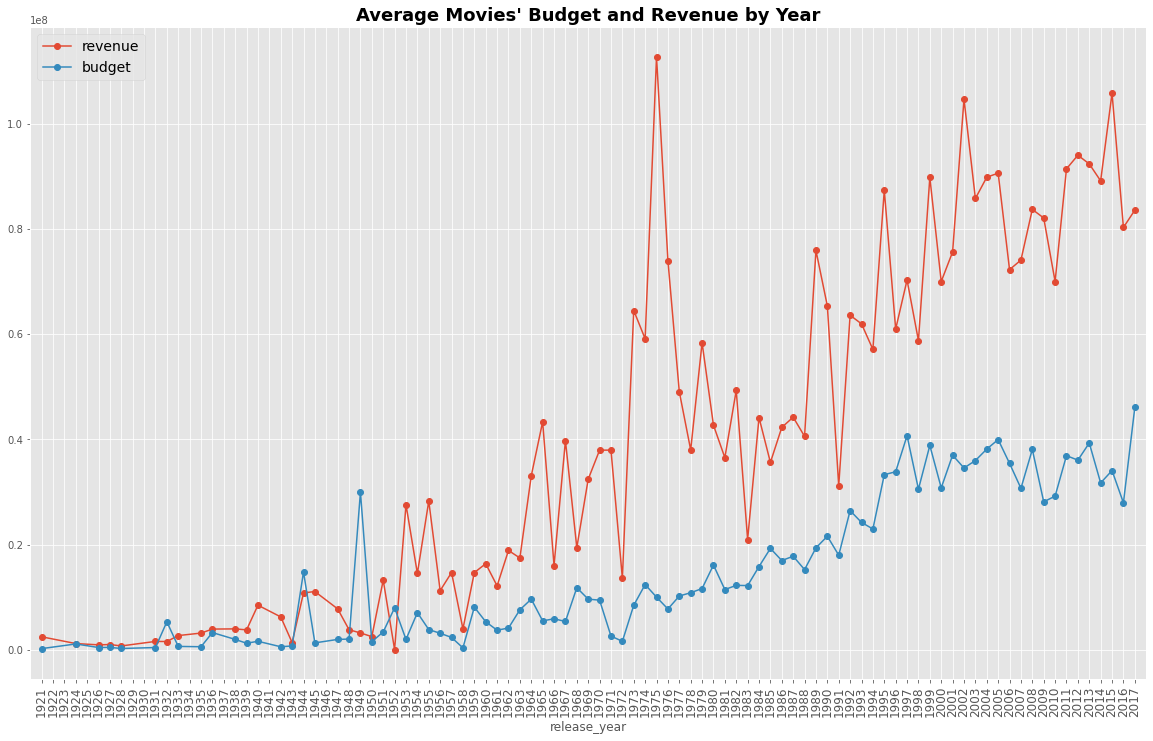

In [132]:
# Display the average budget and revenue by year

plt.figure(figsize = [20, 12])

financials_by_year["revenue"].plot(marker = "o", label = "revenue")
financials_by_year["budget"].plot(marker = "o", label = "budget")

plt.xticks(range(movies["release_year"].min(), movies["release_year"].max()+1), fontsize = 12, rotation = 90);
plt.xlim((movies["release_year"].min()-1, movies["release_year"].max()+1));

plt.legend(loc = "upper left", fontsize = 14)
plt.title("Average Movies' Budget and Revenue by Year");

Both the average budget and revenue have overall increased across the years; as we already mentioned, inflation might have had a role in this. Nevertheless, it is nearly impossible to identify a uniform trend even just over a small period of time; especially the average revenue seems to change quite drastically from a year to another.    

The most evident example is the year 1975, when revenues reached an absolute peak which is far higher than the value recorded during the previous and following year. We can make a similar observation for the mean budget value during 1949; loooking at the graph we created previously, however, we realize that only one movie was released in 1949 so this budget number is not really as representative.

#### Selecting the `release_year` Feature

Considering the non-uniform revenue responses we observed in the previous section, trying to group the years into a few periods (for instance, into decades) would be unfit for our regression purposes. Additionally, such an effort could be inherently wrong since it tends to overlook the order relationship among the years by creating a categorical feature.

This considered, we prefer to use the `release_year` column as a numeric variable. Yet, rather than using the values as they are, in order to obtain a regression line with a more meaningful intercept, we rescale the years making them start from 0. 

In [133]:
# Normalize the `release_year` column as if the first year was year 0
first_year = movies["release_year"].min()

movies["scaled_release_year"] = movies["release_year"] - first_year

In [134]:
# Update the list of numerical features we'll use
numeric_features.append("scaled_release_year")

#### Exploring Movies' Release Months

Let's keep extracting information from the `release_date` column. This time we'll focus on the months.

In [135]:
# Create a `release_month` column
movies["release_month"] = movies["release_date"].apply(lambda x : x.strftime('%b')) # We format the datetimes to obtain the 
                                                                                    # months' names rather than their numbers 

In [136]:
# Transform `release_month` into a categorical column with the standard month order
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
movies["release_month"] = pd.Categorical(movies["release_month"], categories = months, ordered = True)

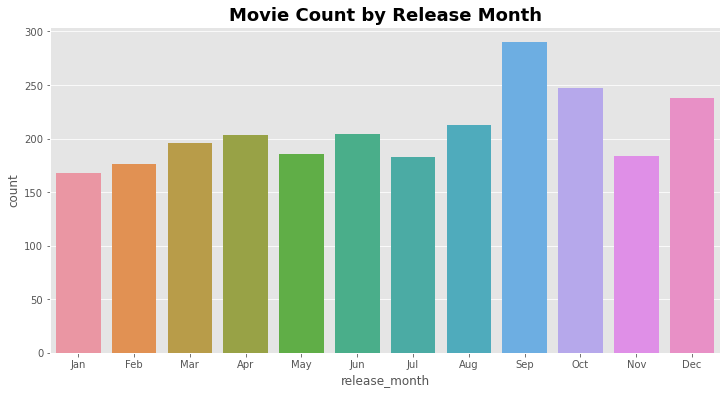

In [137]:
# Display the movie count by release month

sns.countplot(data = movies, x = "release_month")
plt.title("Movie Count by Release Month");

Most movies are released in September, October and December. On the other hand, the other winter months have the smallest movie counts. This makes sense since, as we have already mentioned, the holiday season is a big time for movie releases and right after that, in January and February, things cool off a little (moviewise and weatherwise 😁).   

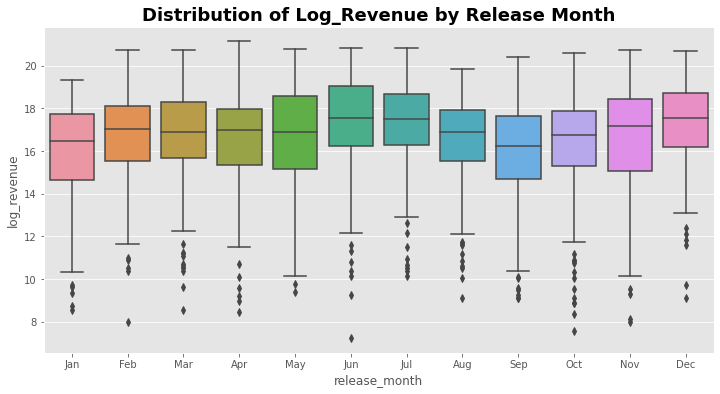

In [138]:
# Display the distribution of log_revenue by release month

sns.boxplot(data = movies, x = "release_month", y = "log_revenue")
plt.title("Distribution of Log_Revenue by Release Month");

December is among the months with highest median revenues; this confirms how popular are the holidays among moviegoers. June and July are very profitable months too. This might be explained with the fact that, during the summer, people are more inclined to get out of the house and go to a theater to watch a movie. Lastly, it's interesting to notice how September, which we saw is the month during which the most movies are released, has the lowest median revenue: it induces us to think that the movie offer during that month is maybe a little too overwhelming for the audience.   

#### Exploring Movies' Release Days

We have worked with movies' release years and release months: let's now look at release days of the week.

In [139]:
# Create a `release_day_of_week` column
movies["release_day_of_week"] = movies["release_date"].apply(lambda x : x.strftime("%a")) 
                                                # We format the datetimes to obtain the days' names rather than their numbers 

In [140]:
# Transform `release_day_of_week` into a categorical column with the standard days order
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
movies["release_day_of_week"] = pd.Categorical(movies["release_day_of_week"], categories = days, ordered = True)

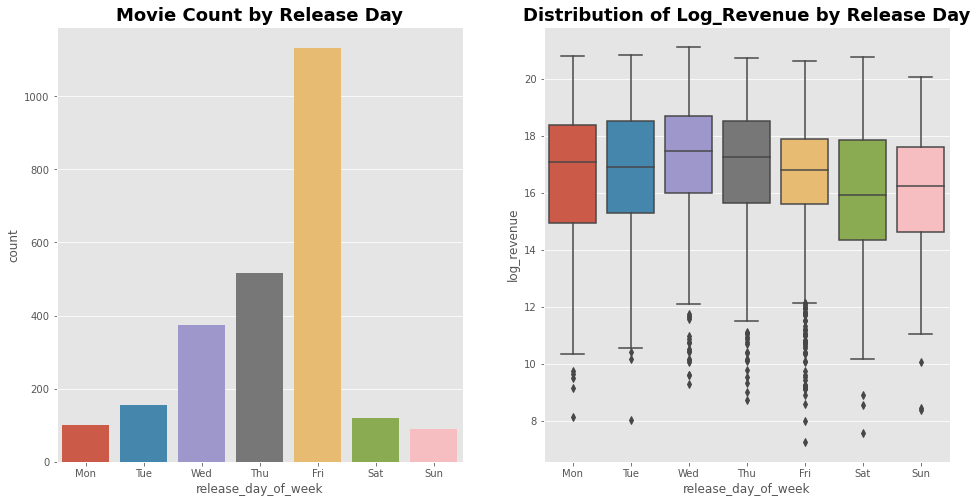

In [141]:
fig, axs = plt.subplots(1,2, figsize = (16,8))

# Draw the movie count by release day of the week
sns.countplot(data = movies, x = "release_day_of_week", ax = axs[0]);
axs[0].set_title("Movie Count by Release Day");

# Draw the log_revenue values grouped by release_day
sns.boxplot(data = movies, x = "release_day_of_week", y = "log_revenue", ax = axs[1]);
axs[1].set_title("Distribution of Log_Revenue by Release Day");

Friday is by far the most popular day for movie releases. It's evident that distribution companies favor this day because it marks the beginning of the weekend and bank on the fact that people are more willing to go out.

Somewhat surprisingly, however, Friday is not the day that yields the greatest box office gross. In fact, movies released on less popular days like Wednesday or Thursday tend to generate bigger revenues. 

#### Creating a Feature which Synthesizes Release Months and Days

At this point we need to decide whether to include release months and release days as training features. In case we do, the most appropriate choice would probably be to treat them both as categorical variables. In fact, even though we can assign numbers to each month and day following their natural ordering, this order relation is circular and is not as meaningful as the one among years.

The solution would therefore consist in dummy encoding both `release_month` and `release_day_of_week`. This would introduce 17 new columns and we are worried this growing number of variables would not improve the accuracy of the models' predictions. Instead, we prefer to create a new numeric feature that, in some sense, is more specific than months and less particular than days of the week: the week of the year. 

In [142]:
# Create a column with the movies' release week number of the year
movies["release_week"] = movies["release_date"].apply(lambda x : x.weekofyear)

In [143]:
# Check the values we obtained are correct keeping in mind a year has a maximum of 53 weeks (rounding up)
np.sort(movies["release_week"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [144]:
# Update the list of numerical features we'll use
numeric_features.append("release_week")

#### Finishing up with the `release_date` Column

We have successfully engineered the `release_date` column: we can finally remove it from the list of features that we still need to process.  

In [145]:
# Remove the `release_date` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["release_date"])

In [146]:
# Update the list of features that are left to treat
features_to_treat = features_to_treat.drop("release_date")

In [147]:
print("The remaining non-numeric features to treat:\n", features_to_treat)

The remaining non-numeric features to treat:
 Index(['original_language', 'main_production_company'], dtype='object')


### Engineering the `original_language` Feature

Let's see if the `original_language` column offers any substantial information we can take advantage of. 
First of all, let's check how many different languages appear in the dataframe and if there are any missing.

In [148]:
print("The dataframe contains movies in {} different languages.".format(len(movies["original_language"].unique())))

The dataframe contains movies in 32 different languages.


In [149]:
# Print the null values count
movies["original_language"].isnull().sum()

0

Now let's see what are the most used languages.

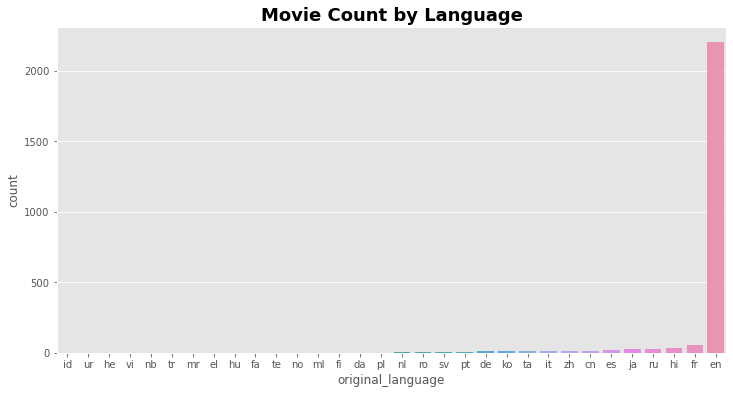

In [150]:
# Plot the original languages frequencies
sns.countplot(x = movies["original_language"], order = movies["original_language"].value_counts().sort_values().index);
plt.title("Movie Count by Language");

Almost all movies are in English. In fact, some of the bars are so short they aren't even visible.

Given this great imbalance, we engineer the `original_language` feature using a *one vs. rest* approach by grouping together all movies that are in a language other than English.

In [151]:
# Create a dichotomous column which distinguishes movies in English
movies["original_language_en"] = np.where(movies["original_language"] == "en", 1, 0)

In [152]:
# Check the new values
movies["original_language_en"].value_counts()

1    2203
0     285
Name: original_language_en, dtype: int64

As usual, we update the lists of features we are keeping track of.

In [153]:
# Update the list of non-numerical features we'll use
non_numeric_features = non_numeric_features.union(["original_language_en"])

In [154]:
# Remove the `original_language` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["original_language"])

In [155]:
# Update the list of features that are left to treat
features_to_treat = features_to_treat.drop("original_language")

In [156]:
print("The remaining non-numeric features to treat:\n", features_to_treat)

The remaining non-numeric features to treat:
 Index(['main_production_company'], dtype='object')


### Exploring the `main_production_company` Column

During the data wrangling step, we have created a `main_production_company` column by collapsing some of the original information we were given.  

As we did above before for the original languages, let's get more information about this column.

In [157]:
print("The dataframe contains {} distinct main production companies.".format(len(movies["main_production_company"].unique())))

The dataframe contains 716 distinct main production companies.


In [158]:
# Print the null values count
movies["main_production_company"].isnull().sum()

72

As it was legitimate to expect, even if we just consider the main ones, we have a large number of distinct production companies. Let's see which are the ones which have produced the greatest number of movies. To keep things tidy, we will only plot the 20 most prolific companies. 

In [159]:
# Prepare the data we want to plot
companies_movie_count = movies["main_production_company"].value_counts().sort_values().rename("count")
top20_companies = companies_movie_count.iloc[-20:]

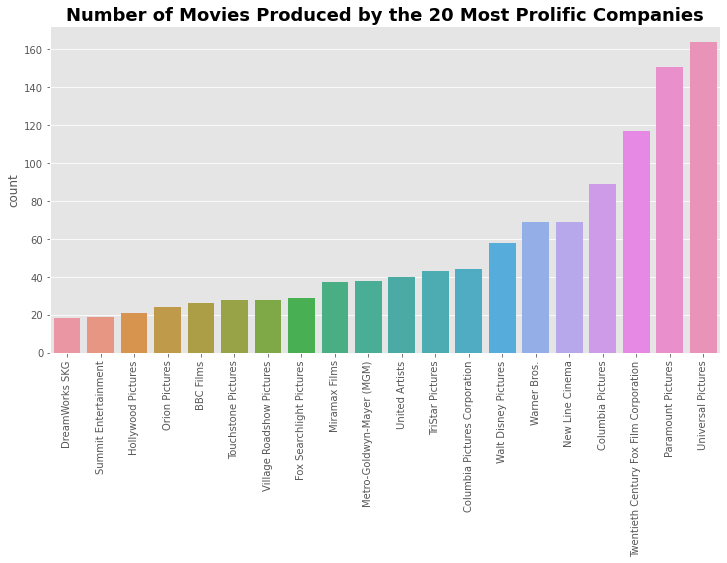

In [160]:
# Plot the movie count of the 20 most prolific production companies
sns.barplot(x = top20_companies.index, y = top20_companies);
plt.xticks(rotation = 90);
plt.title("Number of Movies Produced by the 20 Most Prolific Companies");

The most prolific company (Universal Picture) has produced about 165 movies which corresponds to roughly 7% of the total. We notice also that some companies appear multiple times with just a slight variation in their names. For instance, Columbia Pictures appears twice: once with the *Corporation* suffix and once without.

Now let's check if the most prolific companies are also the ones that generate the highest revenues. In order to do so, we will use a scatterplot to compare the number of movies produced by each company against the mean revenue they generated. 

In [161]:
# Prepare the data to plot
companies_info = movies.groupby("main_production_company").agg({"id" : "size", "revenue" : "mean"}).rename(
                                            columns = {"id" : "count", "revenue" : "mean_revenue"})
# Add a column to distinguish the most prolific companies
companies_info["prolificacy_rating"] = np.where(companies_info.index.isin(top20_companies.index),
                                                "prolific company", "not prolific company")

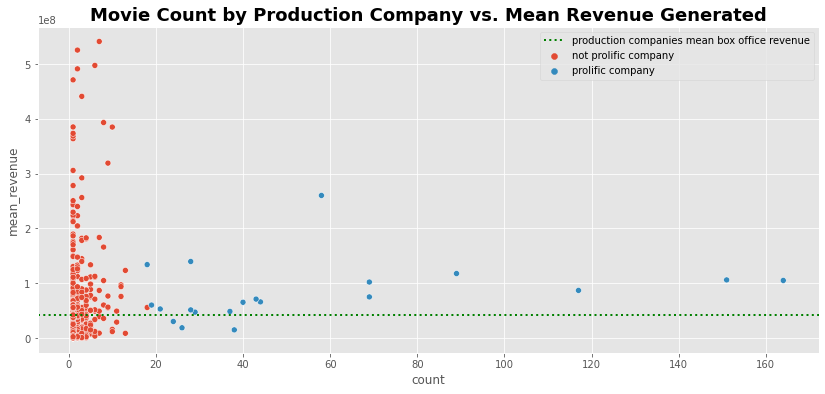

In [162]:
fig, ax = plt.subplots(figsize = (14,6))

# Draw `number of movies produced` vs. `mean revenue` scatterplot
sns.scatterplot(data = companies_info, x = "count", y = "mean_revenue", hue = "prolificacy_rating");

# Add an horizontal line marking the mean revenue movies produced by a company 
ax.axhline(companies_info["mean_revenue"].mean(), color = "green", linestyle = "dotted", lw = 2,
           label = "production companies mean box office revenue")

plt.title("Movie Count by Production Company vs. Mean Revenue Generated");
plt.legend();

Even though almost all the top 20 most prolific production companies generate revenues above average, barely any of them ranks in the top 20 richest companies. In fact, some of the companies with highest box office grosses have produced only one or two movies. 

#### Deciding Whether to Select the `main_production_company` Feature

At this point we have a decision to make: do we want to include production companies as one of our features? If yes, what's the best way to engineer the `main_production_company` column?

Possible strategies to answer the second question are:
- Replace each production company with the mean revenue of the movie it produced; this would generate a continuous numeric variable that we can feed directly into a regression model.
- Choose a subcollection of relevant production companies based on their prolificacy and their mean revenue; consider each one of these companies as a separate categorical level and create a new feature for each of them using one-hot encoding.

Unfortunately both of these approaches have their own flaws connected to data leakage:
- The first one wouldn't allow us to make predictions for movies produced by new companies for which we don't have any past record. Moreover, the null values appearing in the `main_production_company` column would carry over to the newly engineered feature as well;
- The second one imposes the thorny task of choosing a specific subcollection and, just as above, overlooks the possibility of running into new surging production companies.    

Given the considerations above, we prefer to leave the `main_production_company` out of the list of features we will use for modeling. 

In [163]:
# Remove the `main_production_company` column from the list of features we'll use
non_numeric_features = non_numeric_features.drop(["main_production_company"])

In [164]:
# Update the list of features that are left to treat
features_to_treat = features_to_treat.drop("main_production_company")

In [165]:
print("The remaining non-numeric features to treat:\n", features_to_treat)

The remaining non-numeric features to treat:
 Index([], dtype='object')


## Recapping the Features We Will Use for Modeling

Before we dive into the modeling step, let's get a quick recap of all the features we have created.

In [166]:
print("The numeric features are:\n{}".format(numeric_features))

The numeric features are:
['budget', 'log_budget', 'runtime', 'popularity', 'scaled_release_year', 'release_week']


In [167]:
print("The non-numeric features are:\n{}".format(non_numeric_features))

The non-numeric features are:
Index(['belongs_to_collection', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_foreign',
       'genre_history', 'genre_horror', 'genre_music', 'genre_mystery',
       'genre_romance', 'genre_science_fiction', 'genre_thriller',
       'genre_tv_movie', 'genre_war', 'genre_western', 'homepage',
       'original_language_en'],
      dtype='object')


Everything looks good. We can go ahead and merge the two lists into a single collection of features.

In [168]:
# Create a list with all the features we'll use
features = numeric_features + non_numeric_features.tolist()

In [169]:
print("We have a total of {} features.".format(len(features)))

We have a total of 29 features.


Just to be scrupulous, let's also check the target variable is still what we initially set it to be.

In [170]:
# Check the current target variable: we want it to be `log_revenue`
target

['log_revenue']

<a class="anchor" id="step3"></a>

# **Step 3: Predictive Modeling and Performance Evaluation**

After working hard on wrangling the data and creating suitable features, it is finally time to predict movies' box office revenues using regression techniques. In what follows, we will train different models, we will analyze their performances and we will identify the one which yields the most accurate results.  

First of all, we split our dataframe into a training and a hold-out set. We will use the former as the models' primary source of knowledge while the latter plays the role of new, unseen data the models will be tested on.

In [171]:
from sklearn.model_selection import train_test_split

# Create the train and hold-out sets. We set the latter to contain 33% of the total data 
X_train, X_hold, y_train, y_hold = train_test_split(movies[features], movies[target], test_size=0.33, random_state = 0)

Let's also define a function that we can use to evaluate the performance of a model. To measure the accuracy of the predictions we use the Root Mean Squared Error (RMSE). This is a metric which measures by how much, on average, the predicted revenues differ from the true values. Since the original revenues have been log transformed, however, in this context the RMSE yields a multiplicative rather than additive measure of the error. In other words, it will represent the factor by which our predictions are off. 

In [172]:
from sklearn.metrics import mean_squared_error

def predict_and_score(model, X, y):
    """
    Makes prediction and evaluates performance of a model by returning the RMSE value.
    
    :param model: The model we want to use to make predictions. This model must have already been fit to a training set
    :type model: estimator object
    
    :param X: The data we want to predict. It must contain the same features the model was trained on
    :type X: array-like of shape (n_samples, n_features)
    
    :param y: The true values we are trying to predict
    :type y: array-like of shape (n_samples, 1)
    
    :return predictions: The predicted values
    :return rmse: The root mean squared error of the predictions
    """
    
    predictions = model.predict(X)
    
    rmse = mean_squared_error(y, predictions) ** (1/2)
    
    return predictions, rmse

Now that we have set up the correct environment, let's train our first model.

<a class="anchor" id="section_3_1"></a>

## Using a Linear Regression Model

We start with a simple Linear Regression model.

In [173]:
from sklearn.linear_model import LinearRegression

# Instantiate and fit a Linear Regression model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [174]:
# Use Linear Regression to make predictions
LR_predictions, LR_rmse = predict_and_score(LR_model, X_hold, y_hold)

In [175]:
print("The RMSE obtained using Linear Regression is:", LR_rmse)

The RMSE obtained using Linear Regression is: 1.482388022487409


Let's visualize each feature's regression coefficient.

In [176]:
# Create a dataframe with each feature and its regression coefficient
LR_feat_coeffs = pd.DataFrame(data = {"feature" : features, "coefficient" : LR_model.coef_[0]}).sort_values("coefficient")

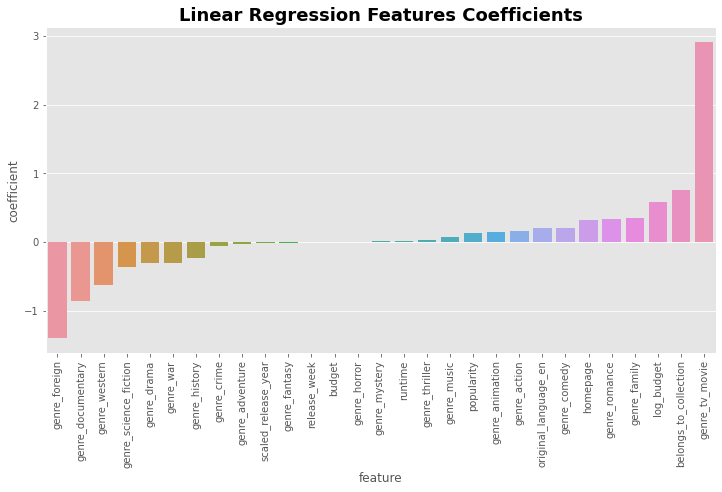

In [177]:
# Visualize the coefficients using a barplot
sns.barplot(data = LR_feat_coeffs, x = "feature", y = "coefficient")
plt.xticks(rotation = 90);
plt.title("Linear Regression Features Coefficients");

The coefficient of the `genre_tv_movie` feature is much higher than any other but we shouldn't attribute this too much importance since there's only one datapoint which falls under the *TV Movie* category. 

In general, the values we plotted must be taken with a grain of salt since we didn't normalize the independent variables; hence, the coefficient will be influenced by the different scale of each feature. 

<a class="anchor" id="section_3_2"></a>

## Using a Ridge Regression Model

Let's now try a Ridge Regression model. Such model is a special kind of Linear Regression which penalizes the less important features by shrinking their coefficients. This helps mitigating their impact on the predictions. The process we described is called *regularization*; the strength of the regularization is determined by a parameter *alpha* to be chosen when the Ridge Regression object is instantiated.

In the next code cell, we will make predictions trying different values of *alpha*. We will then compare the RMSE we obtain each time and see if we reach any accuracy improvement.

In [178]:
from sklearn.linear_model import Ridge

# Train and evaluate Ridge Regression models using different regularization coefficients

alpha_values = [10**i for i in range (-3, 2)] # We use alpha coefficients from 0.001 to 10 increasing in a factor of 10 
RR_rmses = dict() # We will collect the resulting RMSE values in a dictionary with keys the alpha values

for alpha in alpha_values:
    RR_model = Ridge(alpha = alpha, normalize = True); # Set normalize = True to normalize the features before the regression 
                                                       # to avoid incurring into problems with the underlying linear algebra 
    RR_model.fit(X_train, y_train);
    RR_predictions, RR_rmse = predict_and_score(RR_model, X_hold, y_hold);
    RR_rmses[alpha] = RR_rmse

Ridge(alpha=0.001, normalize=True)

Ridge(alpha=0.01, normalize=True)

Ridge(alpha=0.1, normalize=True)

Ridge(alpha=1, normalize=True)

Ridge(alpha=10, normalize=True)

In [179]:
# Recap the Ridge Regression models we used
RR_models = ["RR with alpha={}".format(10**x) for x in range(-3, 2)]

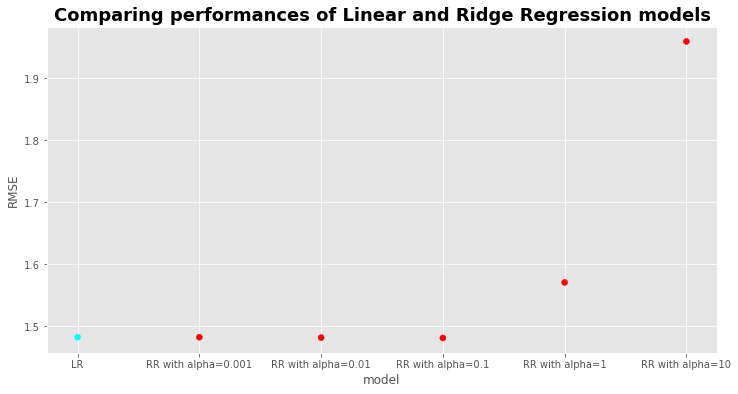

In [180]:
# Visualize the performance of Linear Regression and Ridge Regression models
plt.scatter(x = ["LR"] + RR_models, y = [LR_rmse] + list(RR_rmses.values()),
               color = ["cyan"] + ["red"]*5); # We plot the RMSE we obtained using Linear Regression using a different color
plt.xlabel("model");
plt.ylabel("RMSE");
plt.title("Comparing performances of Linear and Ridge Regression models");

It seems like the best performance was achieved using an alpha value of 0.1; for this case, the predictions we obtain are slightly more accurate than the ones that the simple Linear Regression model yielded.

Let's compare the exact RMSE values.

In [181]:
print("The RMSE obtained using Linear Regression was:", LR_rmse)
print("The lowest RMSE obtained using Ridge Regression is:", RR_rmses[0.1])

The RMSE obtained using Linear Regression was: 1.482388022487409
The lowest RMSE obtained using Ridge Regression is: 1.4811028688822814


<a class="anchor" id="section_3_3"></a>

## Using a Random Forest Regressor

Using Ridge Regression improved the accuracy of the predictions but just very slighlty. Let's see if we can do any better employing a new model. This time we'll try a Random Forest regressor; this is an ensemble method which combines the power of multiple decision trees to improve the predictive accuracy. 

In [182]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit a Random Forest regressor
RF_model = RandomForestRegressor(max_depth = 10, n_estimators = 500, # We use a random forest consisting of 500 trees each
                                 random_state = 0)                   # with a maximum depth of 10 levels.
                                                                     # We also set a random state for reproducibility purposes

RF_model.fit(X_train, y_train)

C:\Users\Olivetti\AppData\Local\Temp/ipykernel_13116/1555952137.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=0)

In [183]:
# Use Random Forest to make predictions
RF_predictions, RF_rmse = predict_and_score(RF_model, X_hold, y_hold)

In [184]:
print("The RMSE obtained using a Random Forest is:", RF_rmse)

The RMSE obtained using a Random Forest is: 1.4524138977620418


The RMSE has decreased again and this time the difference is not as irrelevant as before.

Let's see what are the features that have more weight in the predictions.

In [185]:
# Create a dataframe with each feature and its importance value
RF_feat_importances = pd.DataFrame(data = {"feature" : features, "importance" : RF_model.feature_importances_}
                              ).sort_values("importance")

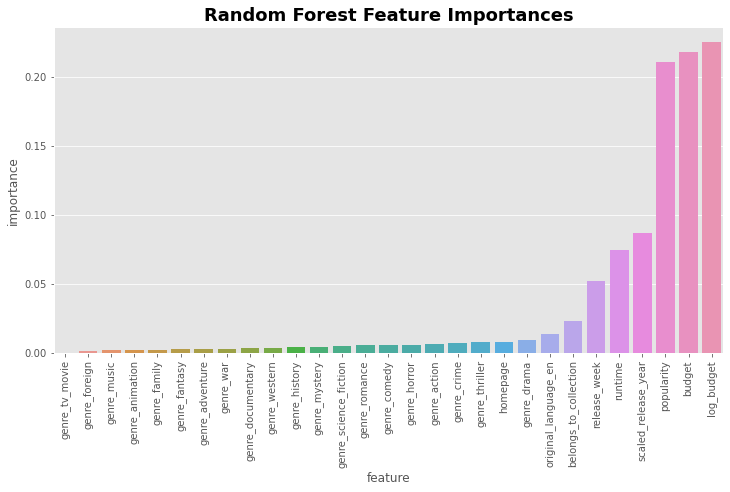

In [186]:
# Visualize the importances using a barplot
sns.barplot(data = RF_feat_importances, x = "feature", y = "importance") # The importance coefficients sum to 1. 
                                                                      # The higher the coefficient,
                                                                      # the more important the feature. 
plt.xticks(rotation = 90);
plt.title("Random Forest Feature Importances");

These importance values are more reliable than the coefficients of the Linear Regression model since, by design, they are not directly influenced by the scale of the features.

<a class="anchor" id="section_3_4"></a>

## Using a Gradient Boosting Regressor

Let's try to use one final model, a Gradient Boosting regressor. This is another type of ensemble method which leverages multiple decision trees. Unlike Random Forests, however, where all decision trees are constructed at the same time, Gradient Boosting performs in stages: at each stage a new tree is trained which focuses on correcting the errors of its predecessor.

In [187]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and fit a Gradient Boosting regressor
GB_model = GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 500,   # We use 500 boosting stages and we shrink
                                     random_state = 0)                           # the learning rate used at each stage.
                                                                     # We also set a random state for reproducibility purposes
GB_model.fit(X_train, y_train)

C:\Users\Olivetti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=0)

In [188]:
# Use Gradient Boosting to make predictions
GB_predictions, GB_rmse = predict_and_score(GB_model, X_hold, y_hold)

In [189]:
print("The RMSE obtained using Gradient Boosting is:", GB_rmse)

The RMSE obtained using Gradient Boosting is: 1.4438335491657703


We were able to lower the RMSE even more achieving the highest accuracy we have obtained so far.

Let's visualize in this case too what are the most important features.

In [190]:
# Create a dataframe with each feature and its importance value
GB_feat_importances = pd.DataFrame(data = {"feature" : features, "importance" : GB_model.feature_importances_}
                              ).sort_values("importance")

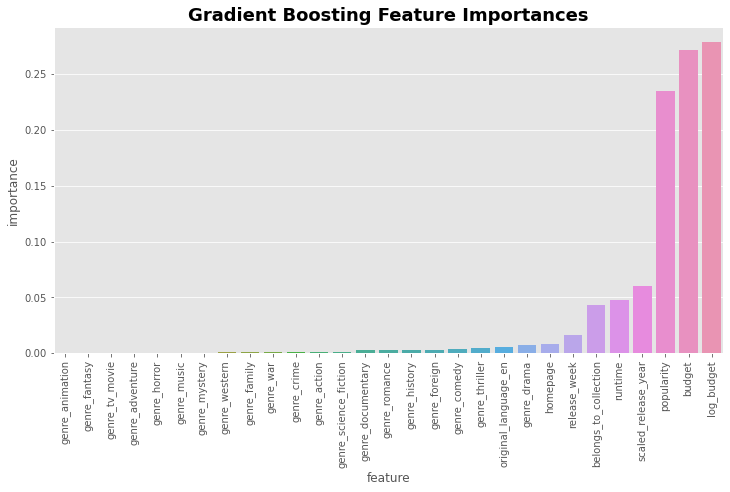

In [191]:
# Visualize the importances using a barplot
sns.barplot(data = GB_feat_importances, x = "feature", y = "importance") # The importance coefficients sum to 1. 
                                                                      # The higher the coefficient,
                                                                      # the more important the feature. 
plt.xticks(rotation = 90);
plt.title("Gradient Boosting Feature Importances");

As one could imagine, the picture is almost identical to the one we obtained using the Random Forest regressor. 

---

<a class="anchor" id="conclusion"></a>

# **Conclusion**

In this project, we analyzed movies data and tried to predict movies box office gross revenues. We started with a total of 3,000 datapoints but we soon realized many of them had invalid budget values. We were able to replace about half of these values through an ad-hoc imputation method; the other half was unsalvageable. After also dropping some outliers, we were left with 2,488 datapoints.

The distribution of the target variable (the movies revenues) had a strong positive skew so we log transformed the values to improve normality and linearity with the features.

After analyzing and visualizing the data, we found out that:
- Movies revenues show a strong correlation with movies budgets.
- *The Avengers*, *Furious 7* and *Avengers: Age of Ultron* are the three movies with highest box office gross.
- About 20% of the movies we have available are part of a collection/series. These kind of movies tend to have higher revenues.
- All movies we consider have been released between 1921 and 2017. The year with the most number of movie releases is 2013.
- Both the movies average revenue and average budget have increased over time; however, their behaviour over the span of just a few consecutive years is very unpredictable.
- September, October and December are the most popular months for movie releases; Friday is the most popular day.
- There are a total of 20 unique genres.
- *Drama* is the most frequent genre, followed by *Comedy* and *Thriller*. The most profitable genres, however, are not necessarily the most frequent. Among the top ones we find *Adventure* and *Animation*; on the bottom there are *Foreign Movies*.

We used machine learning to predict the values of the log transformed revenues. We trained four different types of models: a Linear Regression, a Ridge Regression, a Random Forest and a Gradient Boosting regressor. After comparing their performances, we concluded that the most accurate predictions were achieved through Gradient Boosting. In this case we obtained a Root Mean Squared Error value of 1.4438.   

The features that had the biggest impact when making predictions were *revenue* and *popularity score*.

## Final Observations and Next Steps

In order to improve the quality of the predictions, we make the following observations and suggestions:
- During the data wrangling step, in order to avoid the risk of introducing bias, we decided to drop the rows containing invalid budget values. This, however, increased the risk of overfitting. To fight this issue and maintain a balance between bias and variance, it's a good idea to collect a larger number of observations.
- When we selected the features to use for regression, we left out many of the columns in the dataframe. One can try to manipulate some of these columns and obtain new features which are likely to correlate with revenues. One possible example: we could use the `cast` and `crew` columns (together with an external dataframe) to mark those movies which include Oscar nominated actors or directors.   
- One can train a few more regression models and see if they yield lower RMSE values.